# Initial Data and Packages Setup
***

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
import numpy as np
import scipy.stats as st

# Plotting
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoLocator

# Prediction Model
## Linear
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
## Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
## Ridge
from sklearn.linear_model import Ridge
## Elastic Net
from sklearn.linear_model import ElasticNet


In [2]:
CASS = pd.read_csv("Input\CASS.csv")
PPI = pd.read_csv("Input\PPI.csv")

In [3]:
len(CASS.index)

100

# Initial Data Exploration
***
1. Load quick view of each dataframe
2. Check the datatype of each column and convert to targeted datatype
3. Get descriptive summary for each
4. Plot the data for each variable

In [4]:
CASS

,Date,CASS,LA,AUTOINV,HH,RETAILINV,Gold,Computer,LAP,AUTOINVP,HHP,RETAILINVP,GoldP,ComputerP
0,1/1/2014,2.246,360036.60,2.918,4.85,1.46,2.16,21527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2/1/2014,2.237,284812.35,2.989,4.68,1.44,2.61,21232,-0.208935,0.024332,-0.035052,-0.013699,0.208333,-0.013704
2,3/1/2014,2.246,327497.05,2.791,4.84,1.43,3.22,21491,0.149870,-0.066243,0.034188,-0.006944,0.233716,0.012199
3,4/1/2014,2.268,364126.05,2.771,4.89,1.42,3.13,21631,0.111845,-0.007166,0.010331,-0.006993,-0.027950,0.006514
4,5/1/2014,2.314,351403.60,2.629,4.55,1.42,2.42,20753,-0.034940,-0.051245,-0.069530,0.000000,-0.226837,-0.040590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12/1/2021,3.596,385250.70,0.487,5.53,1.17,4.91,23611,-0.045095,0.154028,-0.034904,0.063636,-0.021912,-0.013578
96,1/1/2022,3.704,427207.70,0.381,5.54,1.15,4.78,23746,0.108908,-0.217659,0.001808,-0.017094,-0.026477,0.005718
97,2/1/2022,3.764,424072.85,0.368,6.39,1.15,4.86,23325,-0.007338,-0.034121,0.153430,0.000000,0.016736,-0.017729
98,3/1/2022,3.806,495195.80,0.462,7.73,1.18,5.18,23742,0.167714,0.255435,0.209703,0.026087,0.065844,0.017878


In [5]:
CASS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        100 non-null    object 
 1   CASS        100 non-null    float64
 2   LA          100 non-null    float64
 3   AUTOINV     100 non-null    float64
 4   HH          100 non-null    float64
 5   RETAILINV   100 non-null    float64
 6   Gold        100 non-null    float64
 7   Computer    100 non-null    int64  
 8   LAP         100 non-null    float64
 9   AUTOINVP    100 non-null    float64
 10  HHP         100 non-null    float64
 11  RETAILINVP  100 non-null    float64
 12  GoldP       100 non-null    float64
 13  ComputerP   100 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
CASS['Date'] = pd.to_datetime(CASS['Date'])

In [7]:
PPI

,DATE,PCU483111483111,T5YIE,HH,USOIL,RETAILINV,TRUCK,RETAILS,T5YIEP,HHP,USOILP,RETAILINVP,TRUCKP,MFSP
0,1/1/2014,263.000,1.72,4.85,97.450,1.46,114.100,373327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2/1/2014,262.200,1.79,4.68,102.650,1.44,114.200,378580,0.040698,-0.035052,0.053361,-0.013699,0.000876,0.014071
2,3/1/2014,262.100,1.70,4.84,101.490,1.43,114.600,382404,-0.050300,0.008900,-0.011300,-0.006900,0.003500,0.010600
3,4/1/2014,263.300,1.96,4.89,99.660,1.42,115.600,386507,0.152900,-0.069600,-0.018000,-0.007000,0.008700,0.010700
4,5/1/2014,264.000,1.93,4.55,102.830,1.42,116.100,386929,-0.015300,0.039000,0.031800,0.000000,0.004300,0.001100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12/1/2021,365.693,2.87,5.53,75.351,1.17,151.618,556810,0.025000,0.001300,0.125600,0.083300,0.008000,-0.029700
96,1/1/2022,367.044,2.82,5.54,88.127,1.15,154.787,576000,-0.017400,0.155200,0.169600,-0.034200,0.016000,0.056700
97,2/1/2022,367.258,3.11,6.39,95.840,1.15,157.999,581768,0.102837,0.153430,0.087521,0.000000,0.020751,0.010014
98,3/1/2022,356.218,3.34,7.73,101.165,1.18,166.089,587570,0.073955,0.209703,0.055561,0.026087,0.051203,0.009973


In [8]:
PPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             100 non-null    object 
 1   PCU483111483111  100 non-null    float64
 2   T5YIE            100 non-null    float64
 3   HH               100 non-null    float64
 4   USOIL            100 non-null    float64
 5   RETAILINV        100 non-null    float64
 6   TRUCK            100 non-null    float64
 7   RETAILS          100 non-null    int64  
 8   T5YIEP           100 non-null    float64
 9   HHP              100 non-null    float64
 10  USOILP           100 non-null    float64
 11  RETAILINVP       100 non-null    float64
 12  TRUCKP           100 non-null    float64
 13  MFSP             100 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 11.1+ KB


In [9]:
PPI['DATE'] = pd.to_datetime(PPI['DATE'])

## General Summary

In [10]:
CASS.describe()

,CASS,LA,AUTOINV,HH,RETAILINV,Gold,Computer,LAP,AUTOINVP,HHP,RETAILINVP,GoldP,ComputerP
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.450980,394183.790000,2.293520,3.78910,1.398200,3.169300,21879.110000,0.014721,-0.012798,0.011135,-0.001634,0.014737,0.001178
std,0.402264,61550.959886,0.734209,1.02873,0.133767,0.982102,996.685445,0.164592,0.113767,0.112720,0.030470,0.111697,0.020129
min,2.067000,220254.550000,0.368000,2.20000,1.090000,1.960000,19500.000000,-0.348915,-0.333785,-0.267742,-0.201183,-0.226837,-0.045259
25%,2.216750,361017.387500,2.185750,3.09500,1.420000,2.427500,21256.750000,-0.083694,-0.049556,-0.037819,-0.006814,-0.050792,-0.010378
50%,2.299000,390863.550000,2.522500,3.46000,1.450000,2.835000,21876.000000,-0.002844,-0.007019,0.011945,0.000000,0.004115,-0.002754
75%,2.468000,431293.325000,2.651250,4.52000,1.480000,3.922500,22672.250000,0.110202,0.020631,0.057244,0.006909,0.071522,0.011040
max,3.865000,535714.200000,4.425000,7.96000,1.690000,5.180000,23936.000000,0.694946,0.646565,0.331818,0.104575,0.353982,0.085026


In [11]:
PPI.describe()

,PCU483111483111,T5YIE,HH,USOIL,RETAILINV,TRUCK,RETAILS,T5YIEP,HHP,USOILP,RETAILINVP,TRUCKP,MFSP
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,284.680230,1.777800,3.78910,59.683320,1.398200,122.755270,443518.370000,0.015276,0.012321,0.010226,-0.001804,0.003912,0.005110
std,34.487817,0.514268,1.02873,19.111252,0.133767,12.146034,57426.351649,0.122879,0.113528,0.140283,0.030807,0.008832,0.028152
min,236.000000,0.490000,2.20000,19.045000,1.090000,111.600000,373327.000000,-0.631600,-0.267100,-0.555900,-0.197600,-0.021100,-0.125200
25%,261.400000,1.485000,3.09500,47.377500,1.420000,113.875000,397593.500000,-0.049850,-0.038100,-0.054025,-0.006800,-0.000900,-0.002025
50%,275.500000,1.700000,3.46000,54.435000,1.450000,119.550000,432815.500000,0.014100,0.011850,0.018050,0.000000,0.002100,0.003350
75%,304.625000,1.972500,4.52000,67.370000,1.480000,125.725000,456559.250000,0.073839,0.060675,0.068250,0.006900,0.008000,0.008425
max,396.763000,3.340000,7.96000,105.450000,1.690000,168.892000,590259.000000,0.469400,0.334000,0.847500,0.098700,0.051203,0.170400


## Summary from 2020

In [12]:
CASS[CASS['Date'] >= '2020-01-1'].describe()

,CASS,LA,AUTOINV,HH,RETAILINV,Gold,Computer,LAP,AUTOINVP,HHP,RETAILINVP,GoldP,ComputerP
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2.923393,433695.444643,1.564179,4.414643,1.225714,4.562857,22647.285714,0.021809,-0.032098,0.042951,-0.004943,0.023979,0.002643
std,0.488959,73359.110816,1.028990,1.508100,0.144976,0.576303,740.623154,0.184255,0.204913,0.116569,0.056422,0.074611,0.014721
min,2.406000,220254.550000,0.368000,2.200000,1.090000,2.710000,21374.000000,-0.348915,-0.333785,-0.267742,-0.201183,-0.111111,-0.017729
25%,2.486000,410524.162500,0.529750,3.055000,1.115000,4.390000,22002.500000,-0.078974,-0.160346,-0.022574,-0.009091,-0.028278,-0.007483
50%,2.746500,458767.275000,1.735500,4.615000,1.200000,4.735000,22690.000000,-0.004494,-0.040870,0.029008,0.000000,0.016470,-0.001025
75%,3.255000,475263.912500,2.104750,5.252500,1.255000,4.920000,23045.250000,0.109271,0.015730,0.082753,0.016065,0.064675,0.009846
max,3.865000,535714.200000,4.425000,7.960000,1.690000,5.180000,23936.000000,0.680378,0.646565,0.331818,0.104575,0.192935,0.043827


In [13]:
PPI[PPI['DATE'] >= '2020-01-1'].describe()

,PCU483111483111,T5YIE,HH,USOIL,RETAILINV,TRUCK,RETAILS,T5YIEP,HHP,USOILP,RETAILINVP,TRUCKP,MFSP
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,319.243679,2.120357,4.414643,59.722214,1.225714,136.725964,516238.964286,0.046822,0.046910,0.042087,-0.006043,0.010462,0.010877
std,33.889527,0.791555,1.508100,22.730058,0.144976,13.819602,54386.241875,0.189978,0.118804,0.220124,0.056938,0.013043,0.052243
min,281.100000,0.490000,2.200000,19.045000,1.090000,120.600000,375918.000000,-0.631600,-0.267100,-0.555900,-0.197600,-0.021100,-0.125200
25%,288.100000,1.567500,3.055000,42.203250,1.115000,125.375000,482085.500000,-0.020825,-0.021775,-0.056150,-0.011400,0.006375,-0.005250
50%,306.800000,2.430000,4.615000,60.480000,1.200000,132.800000,528312.000000,0.046500,0.028527,0.056950,0.000000,0.010250,0.006000
75%,348.528250,2.627500,5.252500,74.006250,1.255000,144.509750,557199.750000,0.137825,0.097325,0.100100,0.018025,0.016100,0.014850
max,396.763000,3.340000,7.960000,104.125000,1.690000,168.892000,590259.000000,0.469400,0.334000,0.847500,0.098700,0.051203,0.170400


## Graphical Plotting & CI

### Functions

In [14]:
def conf_int(frame, alpha, name_list):
    
    col_name = pd.DataFrame(data={'Variable':name_list})
    conf = pd.DataFrame(columns=['CI'])
    
    col = len(frame.columns)
    start = int((col/2)+1)
    
    for i in range(start, col):
        ci = st.t.interval(alpha=alpha, df=len(frame.iloc[:,i])-1, 
        loc=np.mean(frame.iloc[:,i]), 
        scale=st.sem(frame.iloc[:,i]))
        conf.loc[len(conf),'CI'] = ci
    conf =  pd.concat((conf,col_name),axis=1)
    return conf

### Time-series

<function matplotlib.pyplot.show(close=None, block=None)>

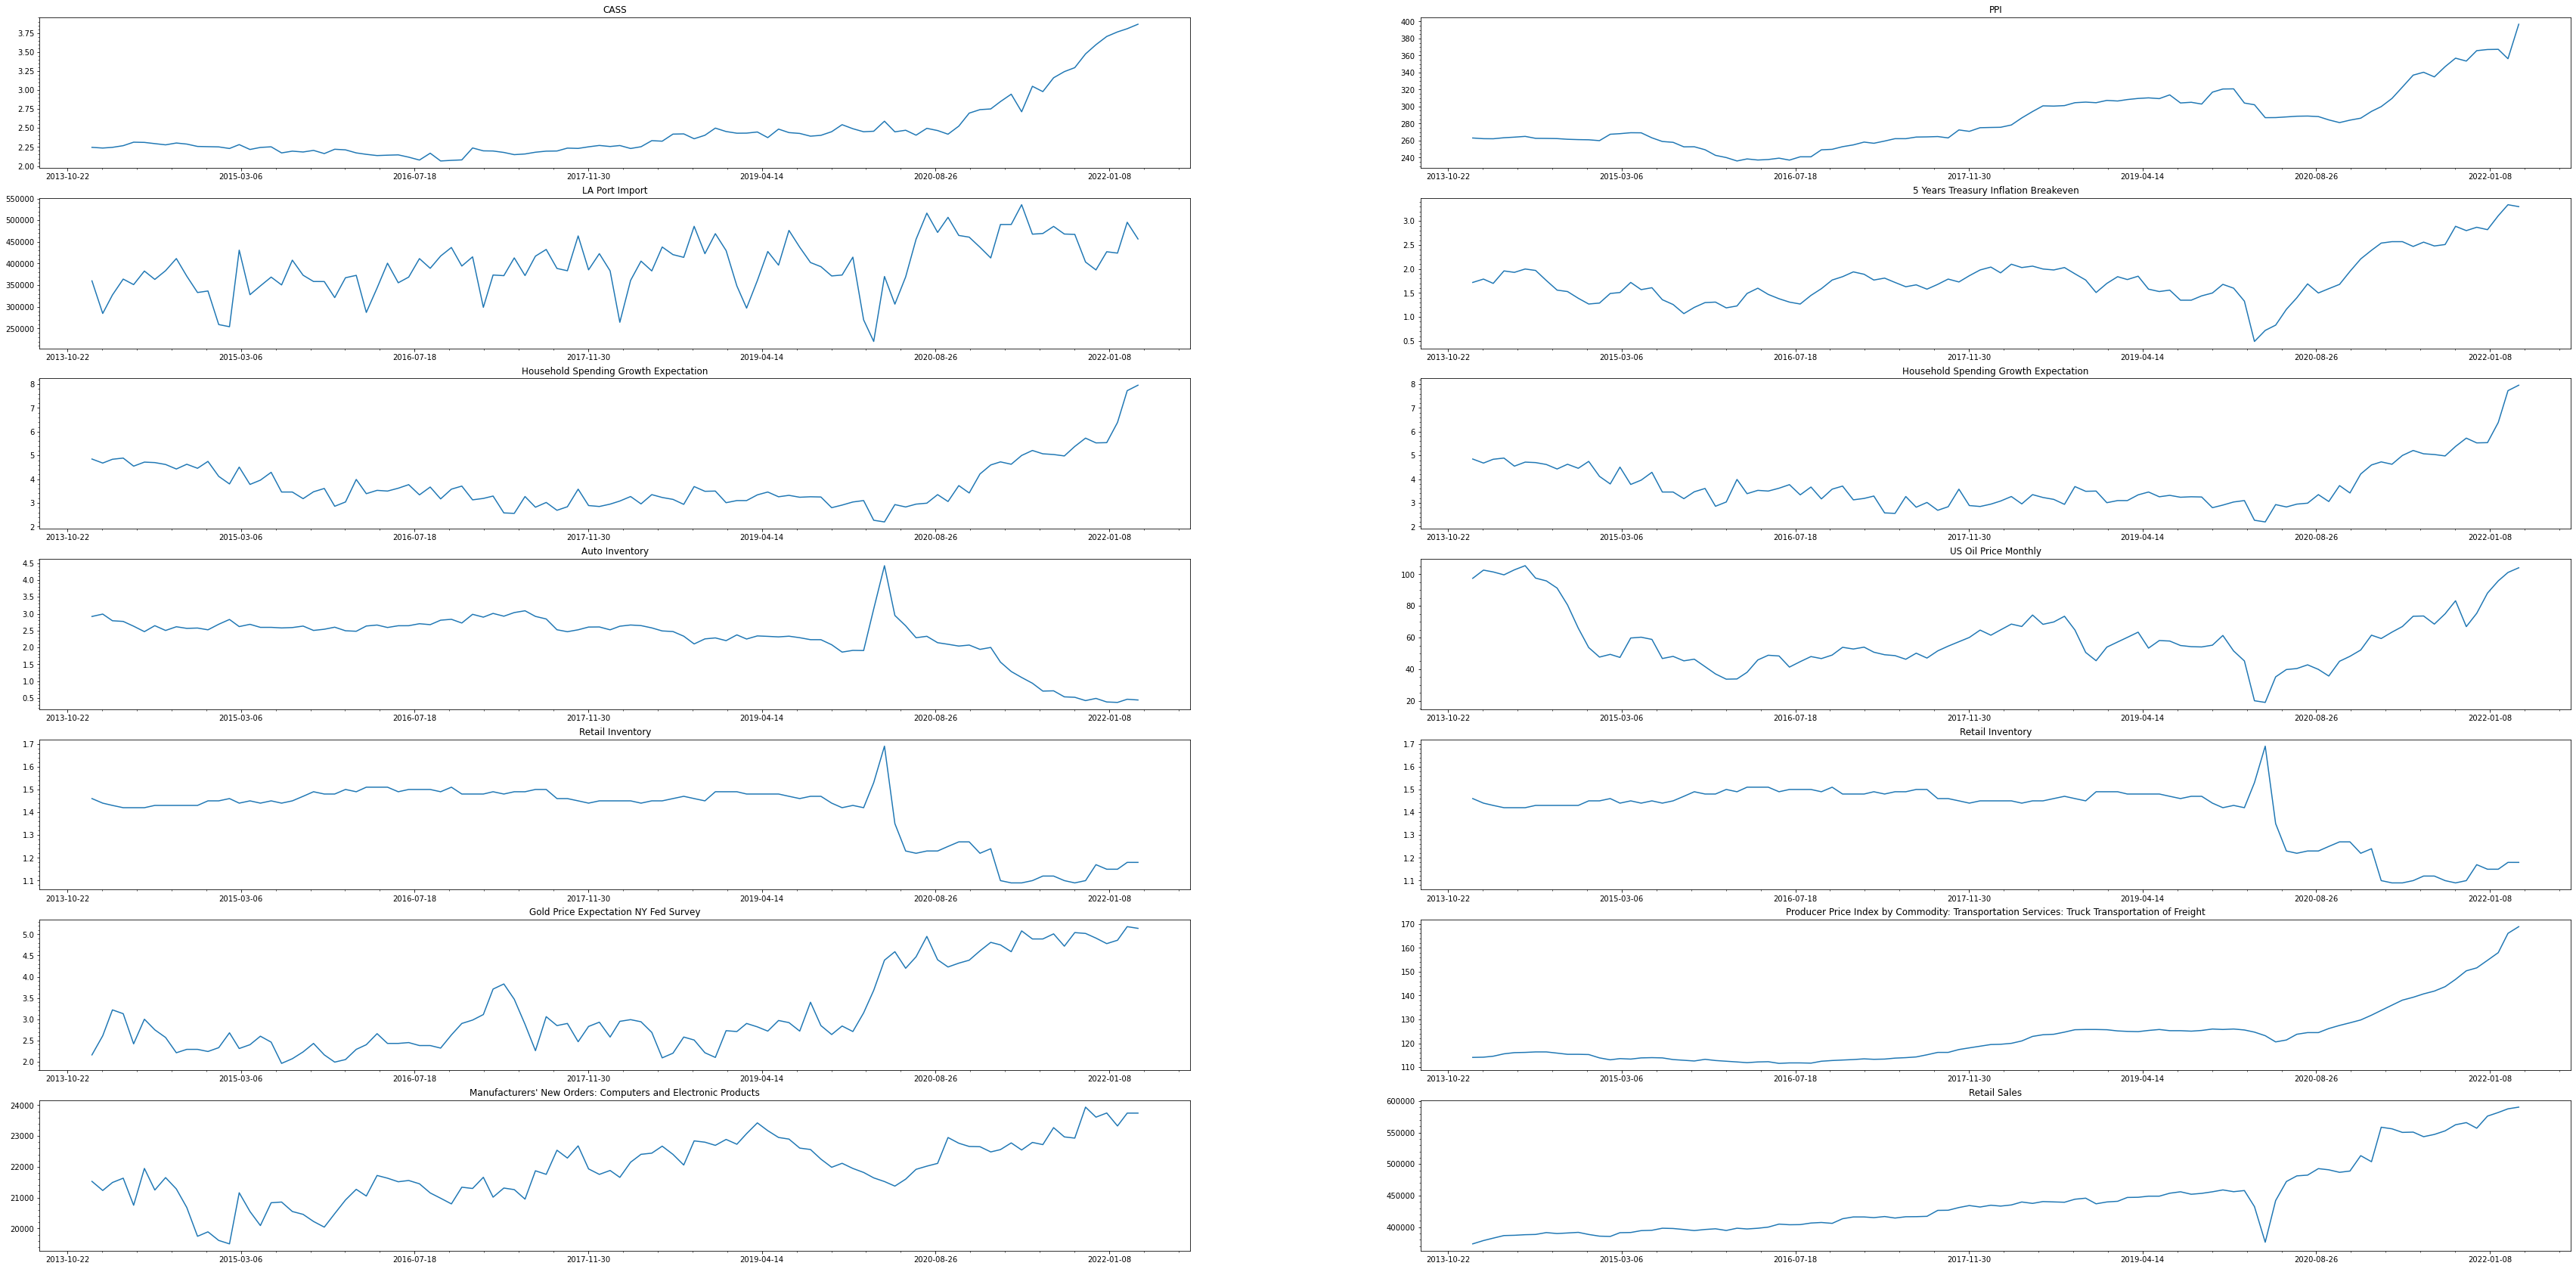

In [15]:
fig, ((axs1,axs2),(axs3,axs4),(axs5,axs6),(axs7,axs8),(axs9,axs10),(axs11,axs12),(axs13,axs14)) = plt.subplots(7, 2, figsize=(60,30))
axl = [axs1,axs2,axs3,axs4,axs5,axs6,axs7,axs8,axs9,axs10,axs11,axs12,axs13,axs14]
axs1.plot(CASS['Date'], CASS.iloc[:,1])
axs1.set_title('CASS')
axs2.plot(PPI['DATE'], PPI.iloc[:,1])
axs2.set_title('PPI')
axs3.plot(CASS['Date'], CASS.iloc[:,2])
axs3.set_title('LA Port Import')
axs4.plot(PPI['DATE'], PPI.iloc[:,2])
axs4.set_title('5 Years Treasury Inflation Breakeven')
axs5.plot(CASS['Date'], CASS.iloc[:,4])
axs5.set_title('Household Spending Growth Expectation')
axs6.plot(PPI['DATE'], PPI.iloc[:,3])
axs6.set_title('Household Spending Growth Expectation')
axs7.plot(CASS['Date'], CASS.iloc[:,3])
axs7.set_title('Auto Inventory')
axs8.plot(PPI['DATE'], PPI.iloc[:,4])
axs8.set_title('US Oil Price Monthly')
axs9.plot(CASS['Date'], CASS.iloc[:,5])
axs9.set_title('Retail Inventory')
axs10.plot(PPI['DATE'], PPI.iloc[:,5])
axs10.set_title('Retail Inventory')
axs11.plot(CASS['Date'], CASS.iloc[:,6])
axs11.set_title('Gold Price Expectation NY Fed Survey')
axs12.plot(PPI['DATE'], PPI.iloc[:,6])
axs12.set_title('Producer Price Index by Commodity: Transportation Services: Truck Transportation of Freight')
axs13.plot(CASS['Date'], CASS.iloc[:,7])
axs13.set_title('Manufacturers\' New Orders: Computers and Electronic Products')
axs14.plot(PPI['DATE'], PPI.iloc[:,7])
axs14.set_title('Retail Sales')
for i in axl :
    i.xaxis.set_minor_locator(AutoMinorLocator())
    i.xaxis.set_major_locator(AutoLocator())
    i.yaxis.set_minor_locator(AutoMinorLocator())
plt.show

### Histogram

array([[<AxesSubplot:title={'center':'LAP'}>,
        <AxesSubplot:title={'center':'AUTOINVP'}>],
       [<AxesSubplot:title={'center':'HHP'}>,
        <AxesSubplot:title={'center':'RETAILINVP'}>],
       [<AxesSubplot:title={'center':'GoldP'}>,
        <AxesSubplot:title={'center':'ComputerP'}>]], dtype=object)

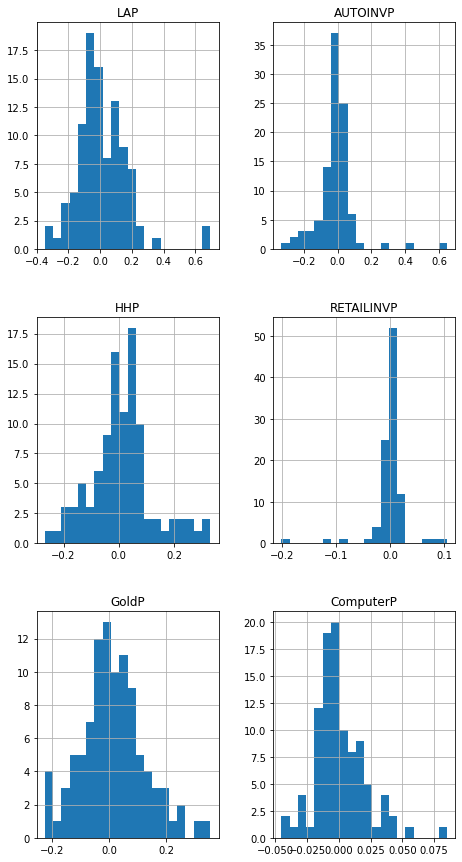

In [16]:
CASS.iloc[:,8:14].hist(bins=20,figsize=(7.5,15))

array([[<AxesSubplot:title={'center':'LAP'}>,
        <AxesSubplot:title={'center':'AUTOINVP'}>],
       [<AxesSubplot:title={'center':'HHP'}>,
        <AxesSubplot:title={'center':'RETAILINVP'}>],
       [<AxesSubplot:title={'center':'GoldP'}>,
        <AxesSubplot:title={'center':'ComputerP'}>]], dtype=object)

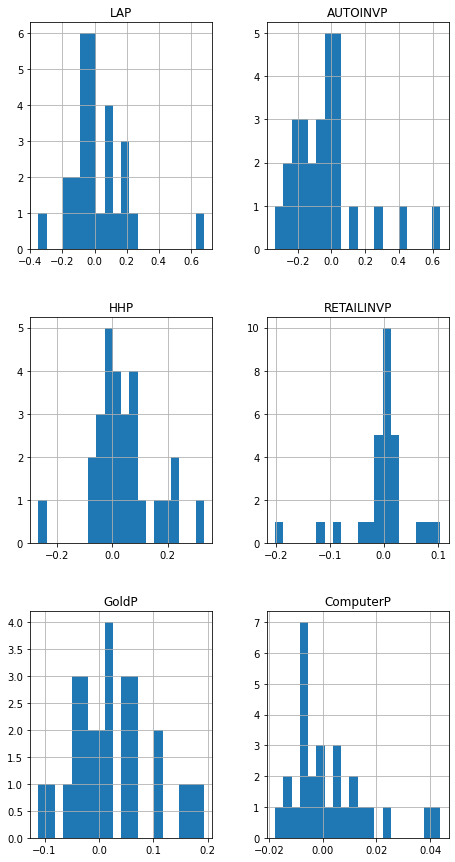

In [17]:
CASS[CASS['Date'] >= '2020-01-1'].iloc[:,8:14].hist(bins=20,figsize=(7.5,15))

array([[<AxesSubplot:title={'center':'T5YIEP'}>,
        <AxesSubplot:title={'center':'HHP'}>],
       [<AxesSubplot:title={'center':'USOILP'}>,
        <AxesSubplot:title={'center':'RETAILINVP'}>],
       [<AxesSubplot:title={'center':'TRUCKP'}>,
        <AxesSubplot:title={'center':'MFSP'}>]], dtype=object)

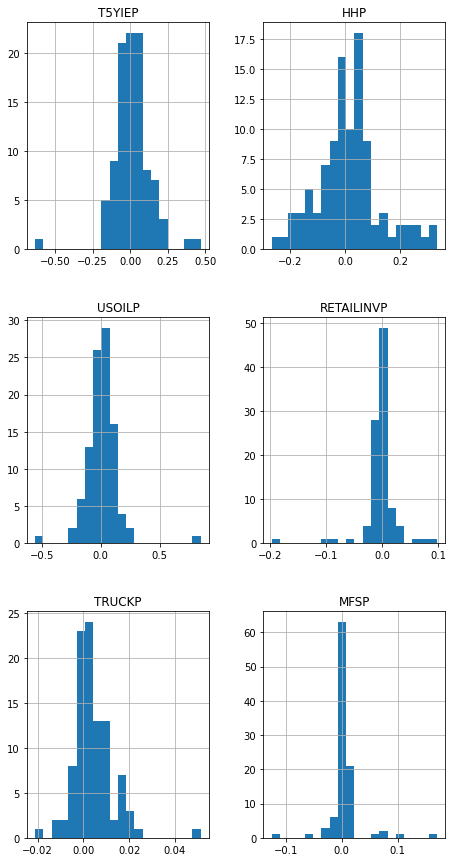

In [18]:
PPI.iloc[:,8:14].hist(bins=20,figsize=(7.5,15))

array([[<AxesSubplot:title={'center':'T5YIEP'}>,
        <AxesSubplot:title={'center':'HHP'}>],
       [<AxesSubplot:title={'center':'USOILP'}>,
        <AxesSubplot:title={'center':'RETAILINVP'}>],
       [<AxesSubplot:title={'center':'TRUCKP'}>,
        <AxesSubplot:title={'center':'MFSP'}>]], dtype=object)

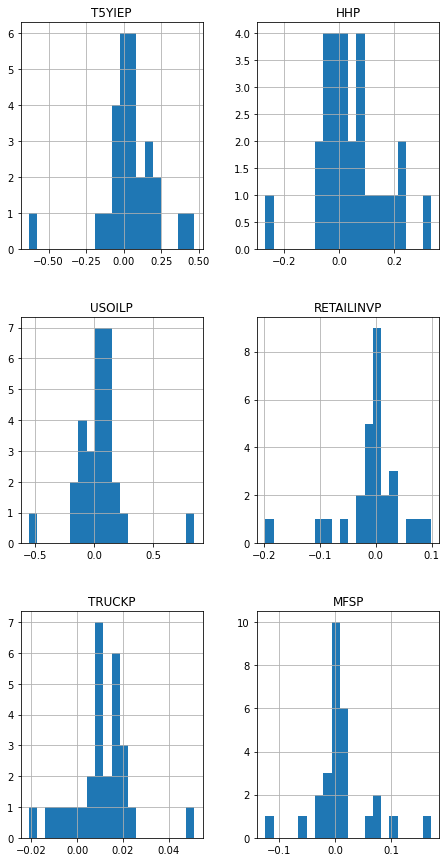

In [19]:
PPI[PPI['DATE'] >= '2020-01-1'].iloc[:,8:14].hist(bins=20,figsize=(7.5,15))

### Confidence Interval

In [20]:
name = ['LA','AUTOINV','HH','RETAILINV','GOLD','COMPUTER']
conf_int(CASS, 0.95, name)

,CI,Variable
0,"(-0.017937677373685637, 0.047379573633685626)",LA
1,"(-0.03537210138497981, 0.009775638644979807)",AUTOINV
2,"(-0.011231159422349401, 0.0335011868423494)",HH
3,"(-0.007680123546195515, 0.004411752566195514)",RETAILINV
4,"(-0.00742630576748466, 0.03689989114748466)",GOLD
5,"(-0.002816374374238626, 0.005171766234238626)",COMPUTER


In [21]:
name = ['LA','AUTOINV','HH','RETAILINV','GOLD','COMPUTER']
conf_int(CASS[CASS['Date'] >= '2020-01-1'], 0.95, name)

,CI,Variable
0,"(-0.04963756322204567, 0.09325591707918852)",LA
1,"(-0.11155501604736981, 0.04735876990451269)",AUTOINV
2,"(-0.002249444204992658, 0.08815183191927836)",HH
3,"(-0.026821453537930307, 0.016934639537930313)",RETAILINV
4,"(-0.00495200973508049, 0.0529100474493662)",GOLD
5,"(-0.0030651560299358956, 0.008351529387078754)",COMPUTER


In [22]:
name = ['T5YIE','HH','USOIL','RETAILINV','TRUCK','RS']
conf_int(PPI, 0.95, name)

,CI,Variable
0,"(-0.009105657017102982, 0.039657926797102984)",T5YIE
1,"(-0.010205161028591979, 0.03484785944859198)",HH
2,"(-0.017609173984118202, 0.03806122596411821)",USOIL
3,"(-0.007916893385734128, 0.004308659925734127)",RETAILINV
4,"(0.002159618700678483, 0.005664518719321519)",TRUCK
5,"(-0.0004755735694344605, 0.010696257309434458)",RS


In [23]:
name = ['T5YIE','HH','USOIL','RETAILINV','TRUCK','RS']
conf_int(PPI[PPI['DATE'] >= '2020-01-1'], 0.95, name)

,CI,Variable
0,"(-0.02684364113558886, 0.12048762792130314)",T5YIE
1,"(0.0008426744885569534, 0.09297778744001448)",HH
2,"(-0.04326796716608121, 0.1274423886660812)",USOIL
3,"(-0.028121436094731996, 0.016034790166160568)",RETAILINV
4,"(0.0054040833888278645, 0.015519519968314995)",TRUCK
5,"(-0.009380333326693748, 0.03113486282669374)",RS


# Projection
***

In [24]:
CASSA = CASS.drop(list(CASS)[8:14],axis=1)
CASSB = CASS.drop(list(CASS)[8:14],axis=1)
CASSC = CASS.drop(list(CASS)[8:14],axis=1)
CASSD = CASS.drop(list(CASS)[8:14],axis=1)
PPIA = PPI.drop(list(PPI)[8:14],axis=1)
PPIB = PPI.drop(list(PPI)[8:14],axis=1)
PPIC = PPI.drop(list(PPI)[8:14],axis=1)
PPID = PPI.drop(list(PPI)[8:14],axis=1)

## Projection of CASS

### Functions

In [25]:
def get_name(frame):
    name =[x for x in globals() if globals()[x] is frame][0]
    return name

In [26]:
def projection(df, var1, var2, var3, var4, var5, var6):
    start = len(df.index)
    
    for i in range(start, start+25):
        df.loc[i,:] = np.nan

    for row in range(start, start+25) :
        df.iloc[row, 0] = df.iloc[(row - 1), 0] + relativedelta(months=+1)
        if row < start+6 :
            df.iloc[row, 2] = df.iloc[(row - 1), 2] * (1 + var1[0] / 100)
            df.iloc[row, 3] = df.iloc[(row - 1), 3] * (1 + var2[0] / 100)
            df.iloc[row, 4] = df.iloc[(row - 1), 4] * (1 + var3[0] / 100)
            df.iloc[row, 5] = df.iloc[(row - 1), 5] * (1 + var4[0] / 100)
            df.iloc[row, 6] = df.iloc[(row - 1), 6] * (1 + var5[0] / 100)
            df.iloc[row, 7] = df.iloc[(row - 1), 7] * (1 + var6[0] / 100)
        elif start+5 < row < start+9:
            df.iloc[row, 2] = df.iloc[(row - 1), 2] * (1 + var1[1] / 100)
            df.iloc[row, 3] = df.iloc[(row - 1), 3] * (1 + var2[1] / 100)
            df.iloc[row, 4] = df.iloc[(row - 1), 4] * (1 + var3[1] / 100)
            df.iloc[row, 5] = df.iloc[(row - 1), 5] * (1 + var4[1] / 100)
            df.iloc[row, 6] = df.iloc[(row - 1), 6] * (1 + var5[1] / 100)
            df.iloc[row, 7] = df.iloc[(row - 1), 7] * (1 + var6[1] / 100)
        elif start+8 < row < start+12:
            df.iloc[row, 2] = df.iloc[(row - 1), 2] * (1 + var1[2] / 100)
            df.iloc[row, 3] = df.iloc[(row - 1), 3] * (1 + var2[2] / 100)
            df.iloc[row, 4] = df.iloc[(row - 1), 4] * (1 + var3[2] / 100)
            df.iloc[row, 5] = df.iloc[(row - 1), 5] * (1 + var4[2] / 100)
            df.iloc[row, 6] = df.iloc[(row - 1), 6] * (1 + var5[2] / 100)
            df.iloc[row, 7] = df.iloc[(row - 1), 7] * (1 + var6[2] / 100)
        elif start+11 < row < start+18:
            df.iloc[row, 2] = df.iloc[(row - 1), 2] * (1 + var1[3] / 100)
            df.iloc[row, 3] = df.iloc[(row - 1), 3] * (1 + var2[3] / 100)
            df.iloc[row, 4] = df.iloc[(row - 1), 4] * (1 + var3[3] / 100)
            df.iloc[row, 5] = df.iloc[(row - 1), 5] * (1 + var4[3] / 100)
            df.iloc[row, 6] = df.iloc[(row - 1), 6] * (1 + var5[3] / 100)
            df.iloc[row, 7] = df.iloc[(row - 1), 7] * (1 + var6[3] / 100)
        elif start+17 < row < start+25:
            df.iloc[row, 2] = df.iloc[(row - 1), 2] * (1 + var1[4] / 100)
            df.iloc[row, 3] = df.iloc[(row - 1), 3] * (1 + var2[4] / 100)
            df.iloc[row, 4] = df.iloc[(row - 1), 4] * (1 + var3[4] / 100)
            df.iloc[row, 5] = df.iloc[(row - 1), 5] * (1 + var4[4] / 100)
            df.iloc[row, 6] = df.iloc[(row - 1), 6] * (1 + var5[4] / 100)
            df.iloc[row, 7] = df.iloc[(row - 1), 7] * (1 + var6[4] / 100)
    print('projection of', get_name(df), 'is done')    
    return df.tail(24)

In [27]:
def plot_proj(df, date_name, t1, t2, t3, t4, t5, t6):
    fig, axs =  plt.subplots(3, 2, figsize=(60,30))
    axs[0,0].plot(df[date_name],df.iloc[:,2])
    axs[0,0].set_title(t1)
    axs[0,1].plot(df[date_name],df.iloc[:,3])
    axs[0,1].set_title(t2)
    axs[1,0].plot(df[date_name],df.iloc[:,4])
    axs[1,0].set_title(t3)
    axs[1,1].plot(df[date_name],df.iloc[:,5])
    axs[1,1].set_title(t4)
    axs[2,0].plot(df[date_name],df.iloc[:,6])
    axs[2,0].set_title(t5)
    axs[2,1].plot(df[date_name],df.iloc[:,7])
    axs[2,1].set_title(t6)
    return plt.show()

### CASS A

In [28]:
LAP = [3.3, 1.1, -1.2, -1.5, 1.8]
AUTOINVP = [20, 11, 3.5, 3.25, 2.75]
HHP = [0.5, -1, -3.95, -2.95, -1.95]
RETAILINVP = [1.5, 1.1, 1.1, 0.8, 0.4]
GoldP = [0.75, -0.9, -3, -1.5, -0.3]
ComputerP = [0.25, 0.15, 0.05, 0.025, 0.015]

projection(CASSA, LAP, AUTOINVP, HHP, RETAILINVP, GoldP, ComputerP)

projection of CASSA is done


,Date,CASS,LA,AUTOINV,HH,RETAILINV,Gold,Computer
101,2022-06-01,NaN,487307.053440,0.633600,8.039799,1.215665,5.217389,23860.858387
102,2022-07-01,NaN,503388.186203,0.760320,8.079998,1.233900,5.256520,23920.510533
103,2022-08-01,NaN,519999.996348,0.912384,8.120398,1.252409,5.295943,23980.311810
104,2022-09-01,NaN,537159.996228,1.094861,8.161000,1.271195,5.335663,24040.262589
105,2022-10-01,NaN,554886.276103,1.313833,8.201805,1.290263,5.375680,24100.363246
106,2022-11-01,NaN,560990.025140,1.458355,8.119787,1.304456,5.327299,24136.513791
107,2022-12-01,NaN,567160.915417,1.618774,8.038589,1.318805,5.279354,24172.718561
108,2023-01-01,NaN,573399.685486,1.796839,7.958203,1.333312,5.231839,24208.977639
109,2023-02-01,NaN,566518.889261,1.859728,7.643854,1.347978,5.074884,24221.082128
110,2023-03-01,NaN,559720.662589,1.924819,7.341922,1.362806,4.922638,24233.192669


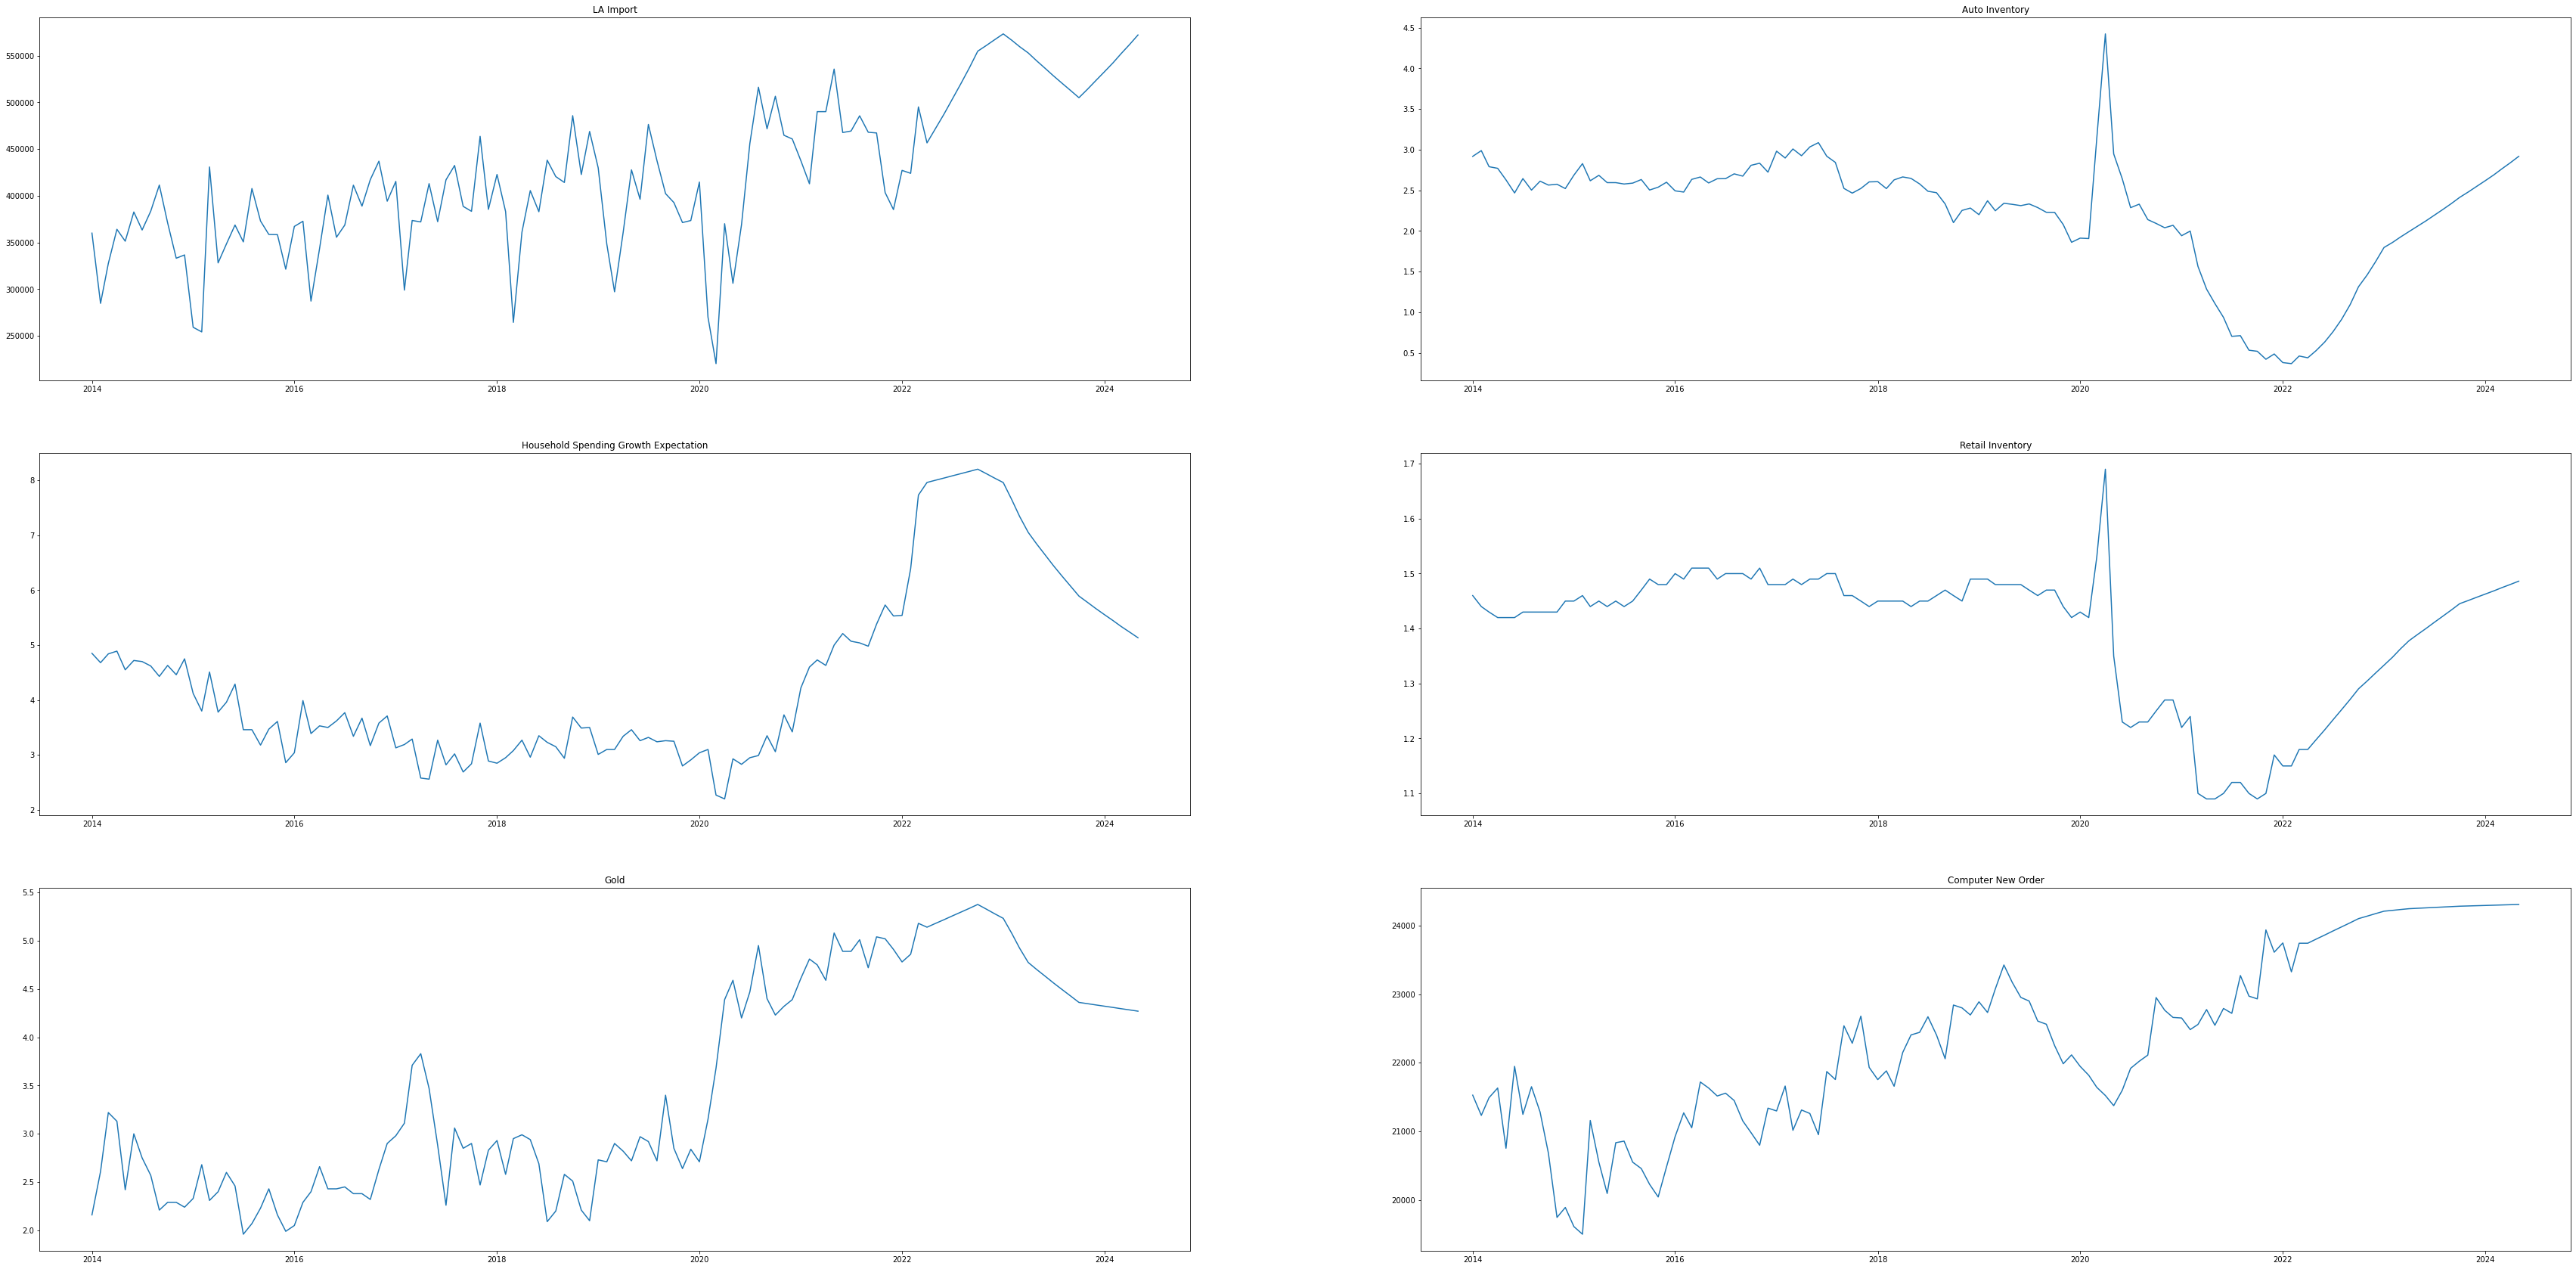

In [29]:
plot_proj(CASSA, 
    'Date',
    'LA Import', 
    'Auto Inventory', 
    'Household Spending Growth Expectation', 
    'Retail Inventory', 
    'Gold', 
    'Computer New Order'
    )

### CASS B

In [30]:
LAP = [3.3, 1.1, -1.2, -1.5, 1.8]
AUTOINVP = [18, 9.5, 3.25, 3.1, 2.5]
HHP = [0.6, -0.9, -3.45, -2.65, -1.65]
RETAILINVP = [1.425, 1.05, 1.05, 0.75, 0.375]
GoldP = [1, -0.8, -2.75, -1.25, -0.25]
ComputerP = [0.25, 0.15, 0.05, 0.025, 0.015]

projection(CASSB, LAP, AUTOINVP, HHP, RETAILINVP, GoldP, ComputerP)

projection of CASSB is done


,Date,CASS,LA,AUTOINV,HH,RETAILINV,Gold,Computer
101,2022-06-01,NaN,487307.053440,0.612656,8.055807,1.213870,5.243314,23860.858387
102,2022-07-01,NaN,503388.186203,0.722934,8.104141,1.231167,5.295747,23920.510533
103,2022-08-01,NaN,519999.996348,0.853062,8.152766,1.248711,5.348705,23980.311810
104,2022-09-01,NaN,537159.996228,1.006613,8.201683,1.266506,5.402192,24040.262589
105,2022-10-01,NaN,554886.276103,1.187804,8.250893,1.284553,5.456214,24100.363246
106,2022-11-01,NaN,560990.025140,1.300645,8.176635,1.298041,5.412564,24136.513791
107,2022-12-01,NaN,567160.915417,1.424206,8.103045,1.311670,5.369263,24172.718561
108,2023-01-01,NaN,573399.685486,1.559506,8.030118,1.325443,5.326309,24208.977639
109,2023-02-01,NaN,566518.889261,1.610190,7.753079,1.339360,5.179836,24221.082128
110,2023-03-01,NaN,559720.662589,1.662521,7.485598,1.353423,5.037390,24233.192669


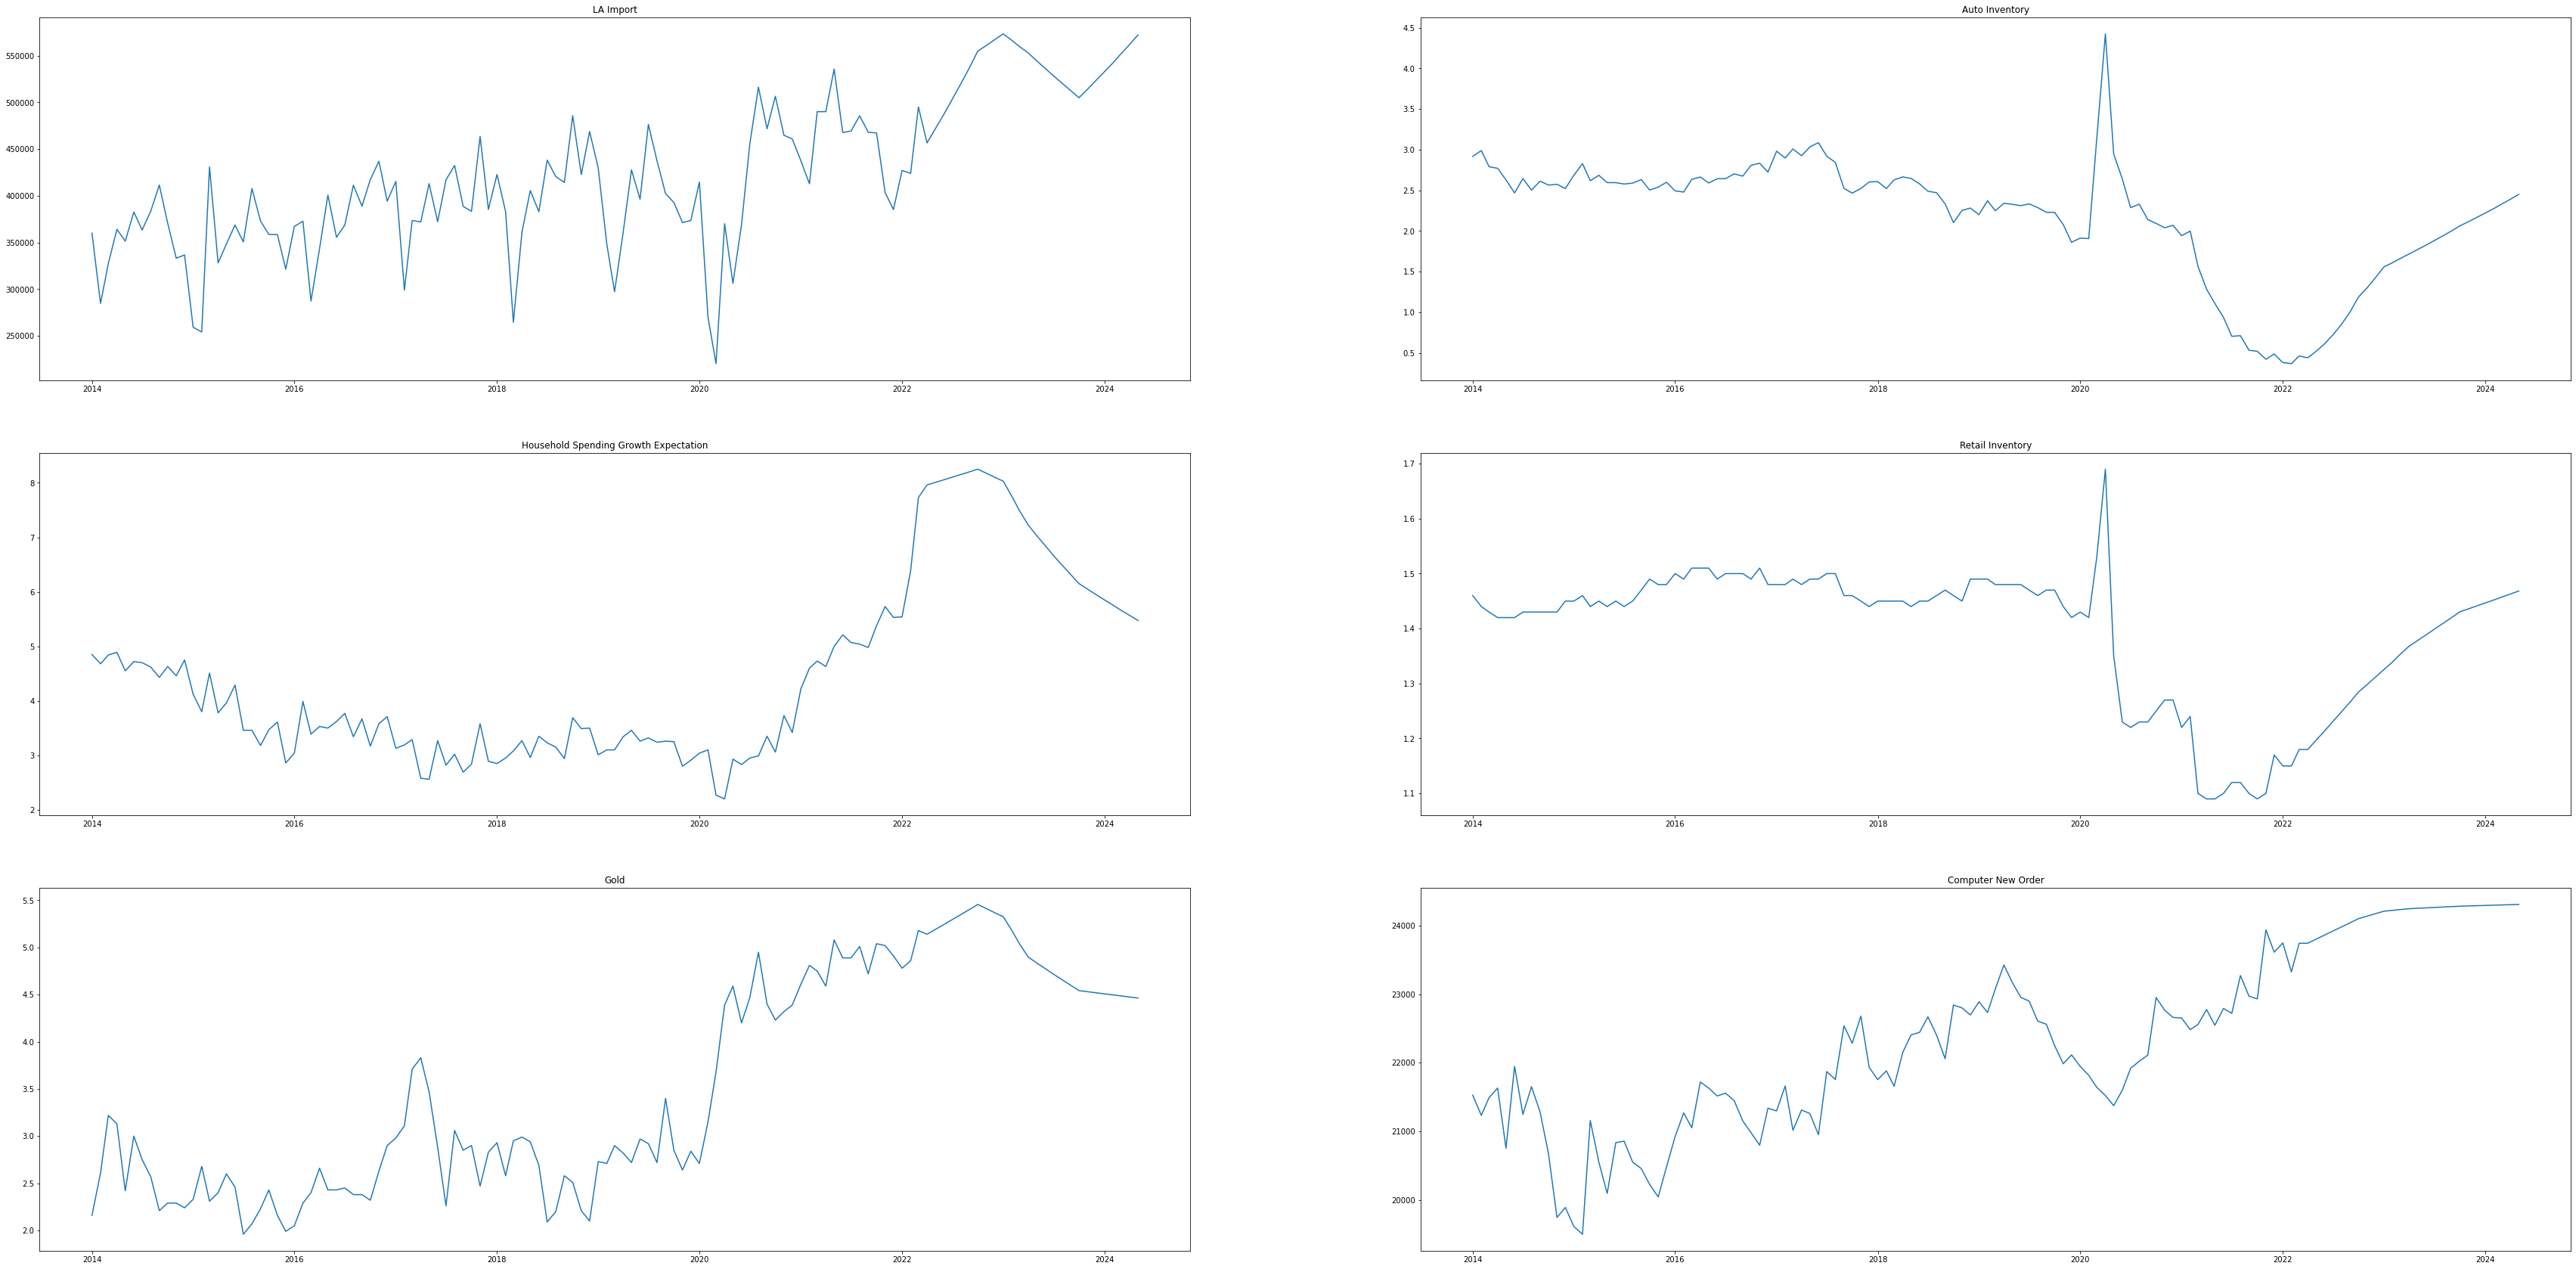

In [31]:
plot_proj(CASSB, 
    'Date',
    'LA Import', 
    'Auto Inventory', 
    'Household Spending Growth Expectation', 
    'Retail Inventory', 
    'Gold', 
    'Computer New Order'
    )

### CASS C

In [32]:
LAP = [3.3, 1.1, -1.2, -1.5, 1.8]
AUTOINVP = [16, 8.5, 3.1, 3, 2.25]
HHP = [0.7, -0.85, -3.35, -2.475, -1.5]
RETAILINVP = [1.385, 1, 1, 0.7, 0.35]
GoldP = [1.2, -0.6, -2, -1, -0.2]
ComputerP = [0.25, 0.15, 0.05, 0.025, 0.015]

projection(CASSC, LAP, AUTOINVP, HHP, RETAILINVP, GoldP, ComputerP)

projection of CASSC is done


,Date,CASS,LA,AUTOINV,HH,RETAILINV,Gold,Computer
101,2022-06-01,NaN,487307.053440,0.592064,8.071830,1.212912,5.264100,23860.858387
102,2022-07-01,NaN,503388.186203,0.686794,8.128333,1.229711,5.327269,23920.510533
103,2022-08-01,NaN,519999.996348,0.796681,8.185231,1.246743,5.391197,23980.311810
104,2022-09-01,NaN,537159.996228,0.924150,8.242528,1.264010,5.455891,24040.262589
105,2022-10-01,NaN,554886.276103,1.072014,8.300225,1.281517,5.521362,24100.363246
106,2022-11-01,NaN,560990.025140,1.163136,8.229674,1.294332,5.488233,24136.513791
107,2022-12-01,NaN,567160.915417,1.262002,8.159721,1.307275,5.455304,24172.718561
108,2023-01-01,NaN,573399.685486,1.369272,8.090364,1.320348,5.422572,24208.977639
109,2023-02-01,NaN,566518.889261,1.411720,7.819337,1.333551,5.314121,24221.082128
110,2023-03-01,NaN,559720.662589,1.455483,7.557389,1.346887,5.207838,24233.192669


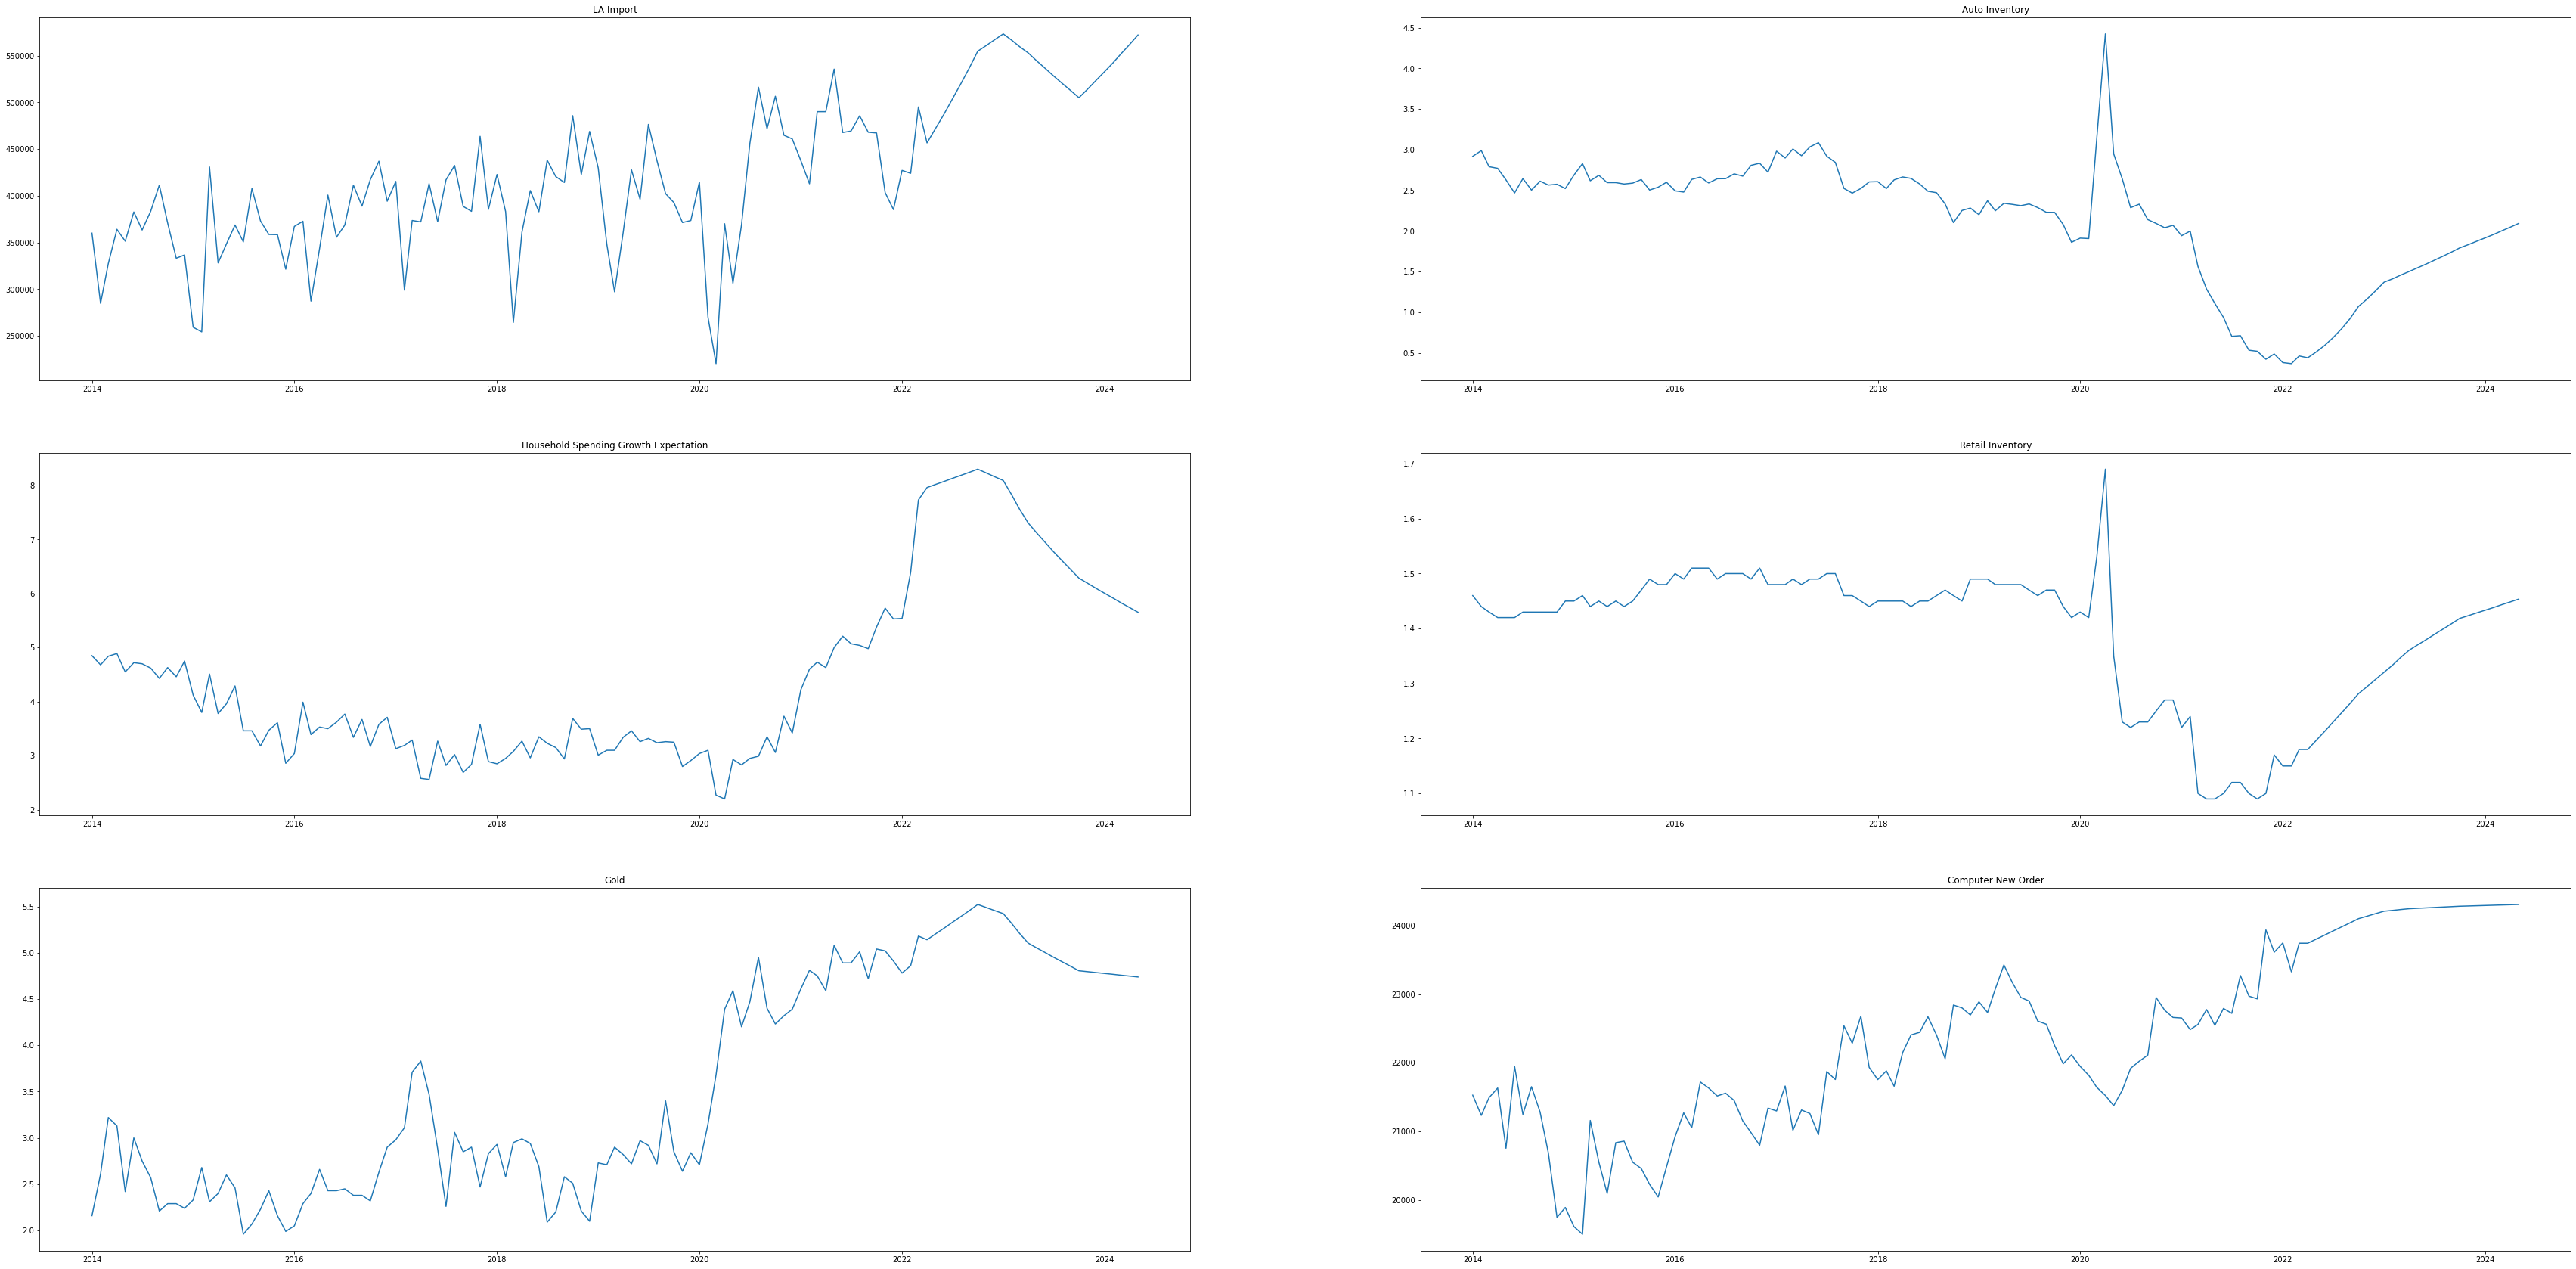

In [33]:
plot_proj(CASSC, 
    'Date',
    'LA Import', 
    'Auto Inventory', 
    'Household Spending Growth Expectation', 
    'Retail Inventory', 
    'Gold', 
    'Computer New Order'
    )

### CASS D

In [34]:
LAP = [3.3, 1.1, -1.2, -1.5, 1.8]
AUTOINVP = [14, 8, 3, 2.9, 2]
HHP = [0.8, -0.8, -3.115, -2.295, -1.3]
RETAILINVP = [1.345, 0.95, 0.95, 0.65, 0.3]
GoldP = [1.4, -0.4, -1.75, -0.75, -0.1]
ComputerP = [0.25, 0.15, 0.05, 0.025, 0.015]

projection(CASSD, LAP, AUTOINVP, HHP, RETAILINVP, GoldP, ComputerP)

projection of CASSD is done


,Date,CASS,LA,AUTOINV,HH,RETAILINV,Gold,Computer
101,2022-06-01,NaN,487307.053440,0.571824,8.087869,1.211955,5.284927,23860.858387
102,2022-07-01,NaN,503388.186203,0.651879,8.152572,1.228256,5.358916,23920.510533
103,2022-08-01,NaN,519999.996348,0.743142,8.217793,1.244776,5.433941,23980.311810
104,2022-09-01,NaN,537159.996228,0.847182,8.283535,1.261519,5.510016,24040.262589
105,2022-10-01,NaN,554886.276103,0.965788,8.349804,1.278486,5.587157,24100.363246
106,2022-11-01,NaN,560990.025140,1.043051,8.283005,1.290632,5.564808,24136.513791
107,2022-12-01,NaN,567160.915417,1.126495,8.216741,1.302893,5.542549,24172.718561
108,2023-01-01,NaN,573399.685486,1.216615,8.151007,1.315270,5.520379,24208.977639
109,2023-02-01,NaN,566518.889261,1.253113,7.897103,1.327765,5.423772,24221.082128
110,2023-03-01,NaN,559720.662589,1.290707,7.651109,1.340379,5.328856,24233.192669


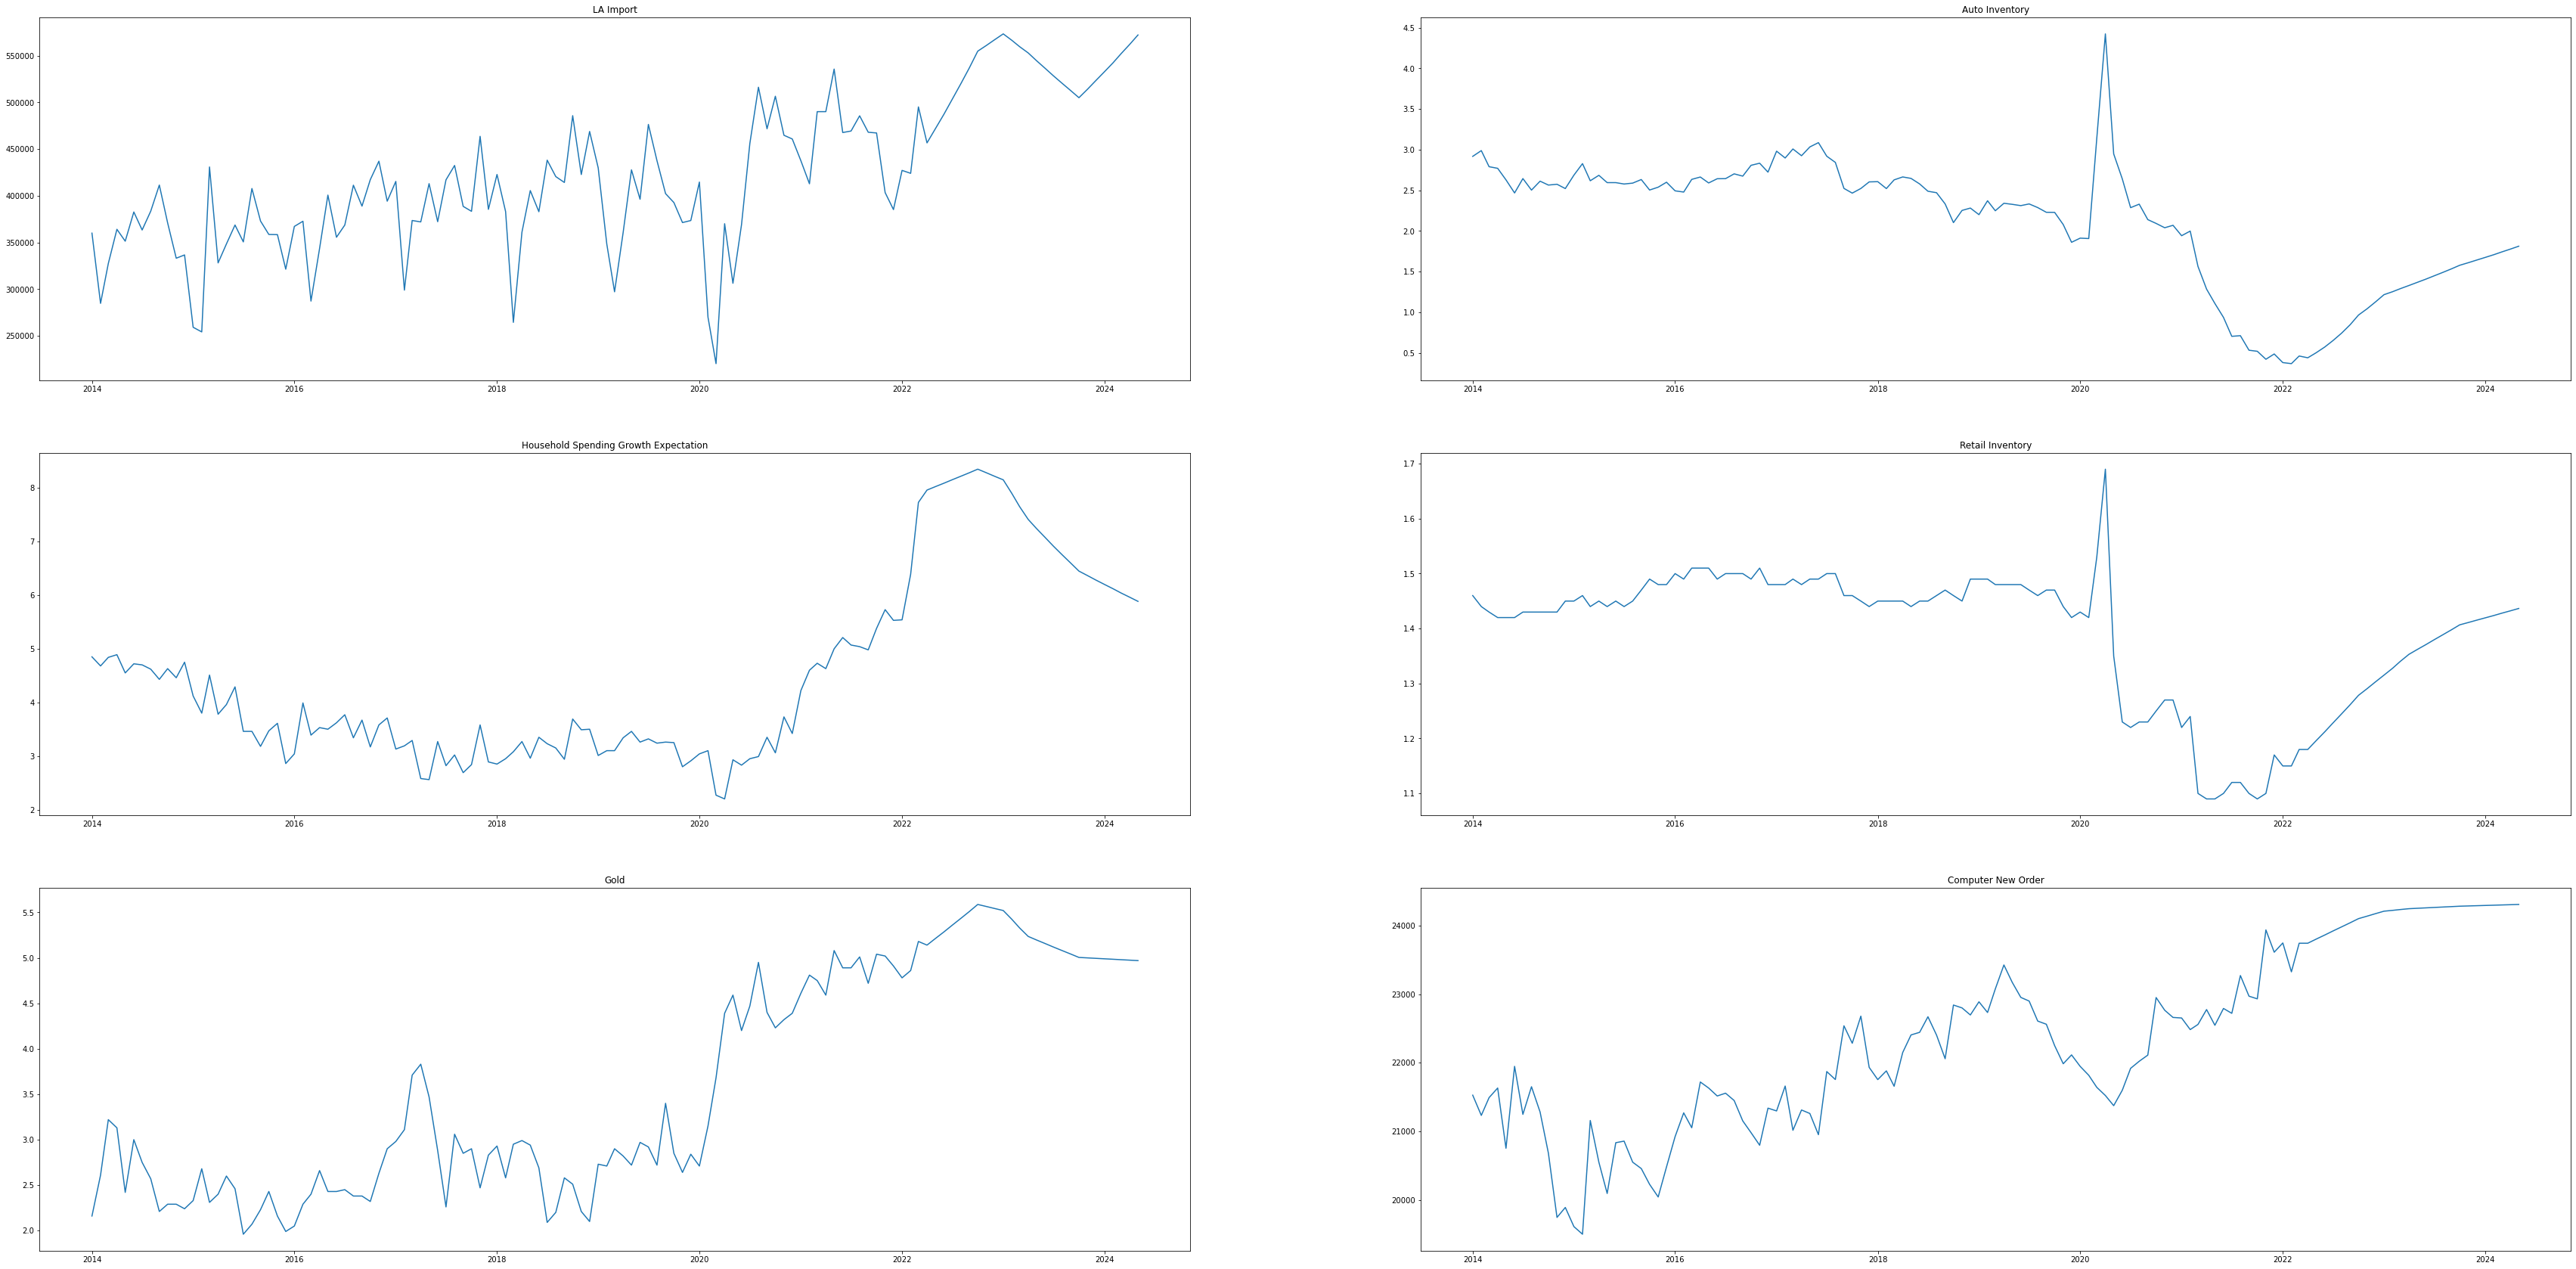

In [35]:
plot_proj(CASSD, 
    'Date',
    'LA Import', 
    'Auto Inventory', 
    'Household Spending Growth Expectation', 
    'Retail Inventory', 
    'Gold', 
    'Computer New Order'
    )

## Projection of PPI

### PPI A

In [36]:
T5YIEP = [0.25, -0.95, -2.8, -2.2, -1.15]
USOILP = [1.5, -1.25, -1.75, -1.45, -1.2]
HHP = [0.5, -1, -3.95, -2.95, -1.95]
RETAILINVP = [1.5, 1.1, 1.4, 0.85, 0.4]
TRUCKP = [0.75, -0.9, -2, -1.05, -0.7]
RS = [0.85, -1.15, -1.05, -0.65, -0.35]

projection(PPIA, T5YIEP, USOILP, HHP, RETAILINVP, TRUCKP, RS)

projection of PPIA is done


,DATE,PCU483111483111,T5YIE,HH,USOIL,RETAILINV,TRUCK,RETAILS
101,2022-06-01,NaN,3.316521,8.200591,105.168853,1.215665,171.434880,600336.049213
102,2022-07-01,NaN,3.324812,8.323600,105.694697,1.233900,172.720642,605438.905631
103,2022-08-01,NaN,3.333124,8.448454,106.223171,1.252409,174.016047,610585.136329
104,2022-09-01,NaN,3.341457,8.575181,106.754287,1.271195,175.321167,615775.109988
105,2022-10-01,NaN,3.349810,8.703808,107.288058,1.290263,176.636076,621009.198423
106,2022-11-01,NaN,3.317987,8.595011,106.215178,1.304456,175.046351,613867.592641
107,2022-12-01,NaN,3.286466,8.487573,105.153026,1.318805,173.470934,606808.115325
108,2023-01-01,NaN,3.255245,8.381478,104.101496,1.333312,171.909695,599829.821999
109,2023-02-01,NaN,3.164098,8.234803,99.989486,1.351978,168.471502,593531.608868
110,2023-03-01,NaN,3.075503,8.090694,96.039902,1.370906,165.102072,587299.526975


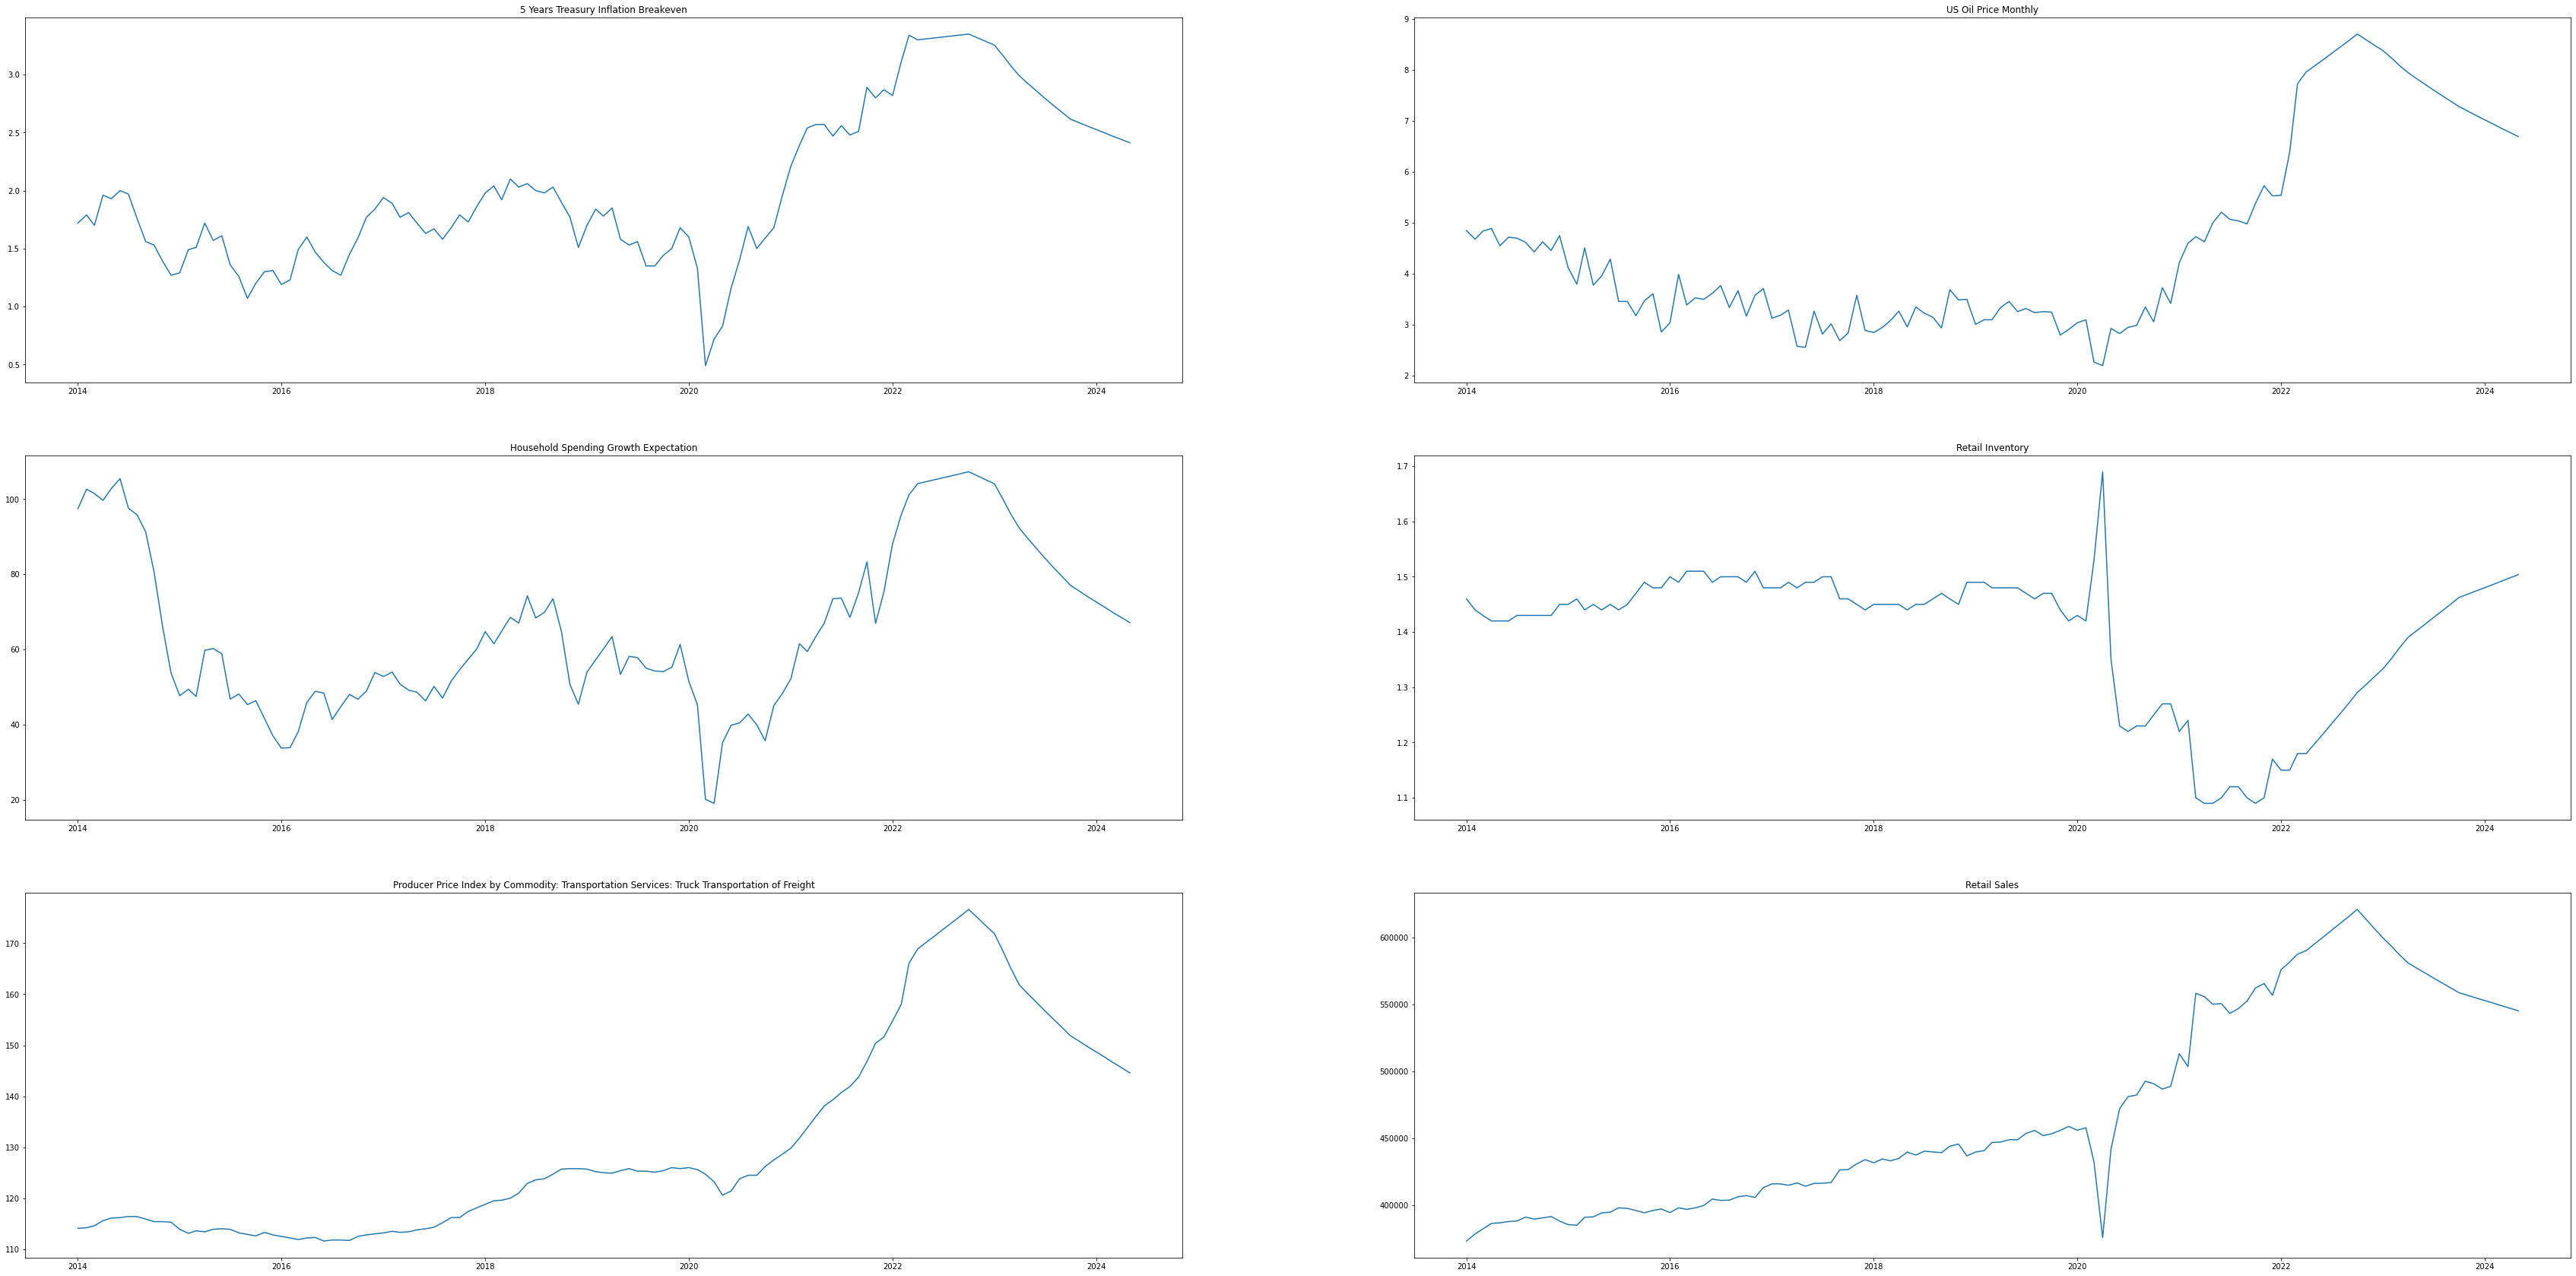

In [37]:
plot_proj(PPIA, 
    'DATE',
    '5 Years Treasury Inflation Breakeven', 
    'US Oil Price Monthly', 
    'Household Spending Growth Expectation', 
    'Retail Inventory', 
    'Producer Price Index by Commodity: Transportation Services: Truck Transportation of Freight', 
    'Retail Sales'
    )

### PPI B

In [38]:
T5YIEP = [0.3, -0.775, -2.35, -1.8, -0.975]
USOILP = [1.75, -1.05, -1.25, -1.05, -0.975]
HHP = [0.6, -0.9, -3.45, -2.65, -1.65]
RETAILINVP = [1.425, 1.05, 1.05, 0.75, 0.375]
TRUCKP = [0.875, -0.75, -1.6, -0.975, -0.6]
MFSP = [0.975, -0.95, -0.875, -0.475, -0.3]

projection(PPIB, T5YIEP, USOILP, HHP, RETAILINVP, TRUCKP, RS)

projection of PPIB is done


,DATE,PCU483111483111,T5YIE,HH,USOIL,RETAILINV,TRUCK,RETAILS
101,2022-06-01,NaN,3.319830,8.241038,105.378249,1.213870,171.860541,600336.049213
102,2022-07-01,NaN,3.329789,8.385256,106.010518,1.231167,173.364321,605438.905631
103,2022-08-01,NaN,3.339779,8.531998,106.646581,1.248711,174.881258,610585.136329
104,2022-09-01,NaN,3.349798,8.681308,107.286461,1.266506,176.411469,615775.109988
105,2022-10-01,NaN,3.359847,8.833231,107.930179,1.284553,177.955070,621009.198423
106,2022-11-01,NaN,3.333808,8.740482,106.958808,1.298041,176.620407,613867.592641
107,2022-12-01,NaN,3.307971,8.648707,105.996178,1.311670,175.295754,606808.115325
108,2023-01-01,NaN,3.282335,8.557895,105.042213,1.325443,173.981035,599829.821999
109,2023-02-01,NaN,3.205200,8.450922,101.418257,1.339360,171.197339,593531.608868
110,2023-03-01,NaN,3.129878,8.345285,97.919327,1.353423,168.458181,587299.526975


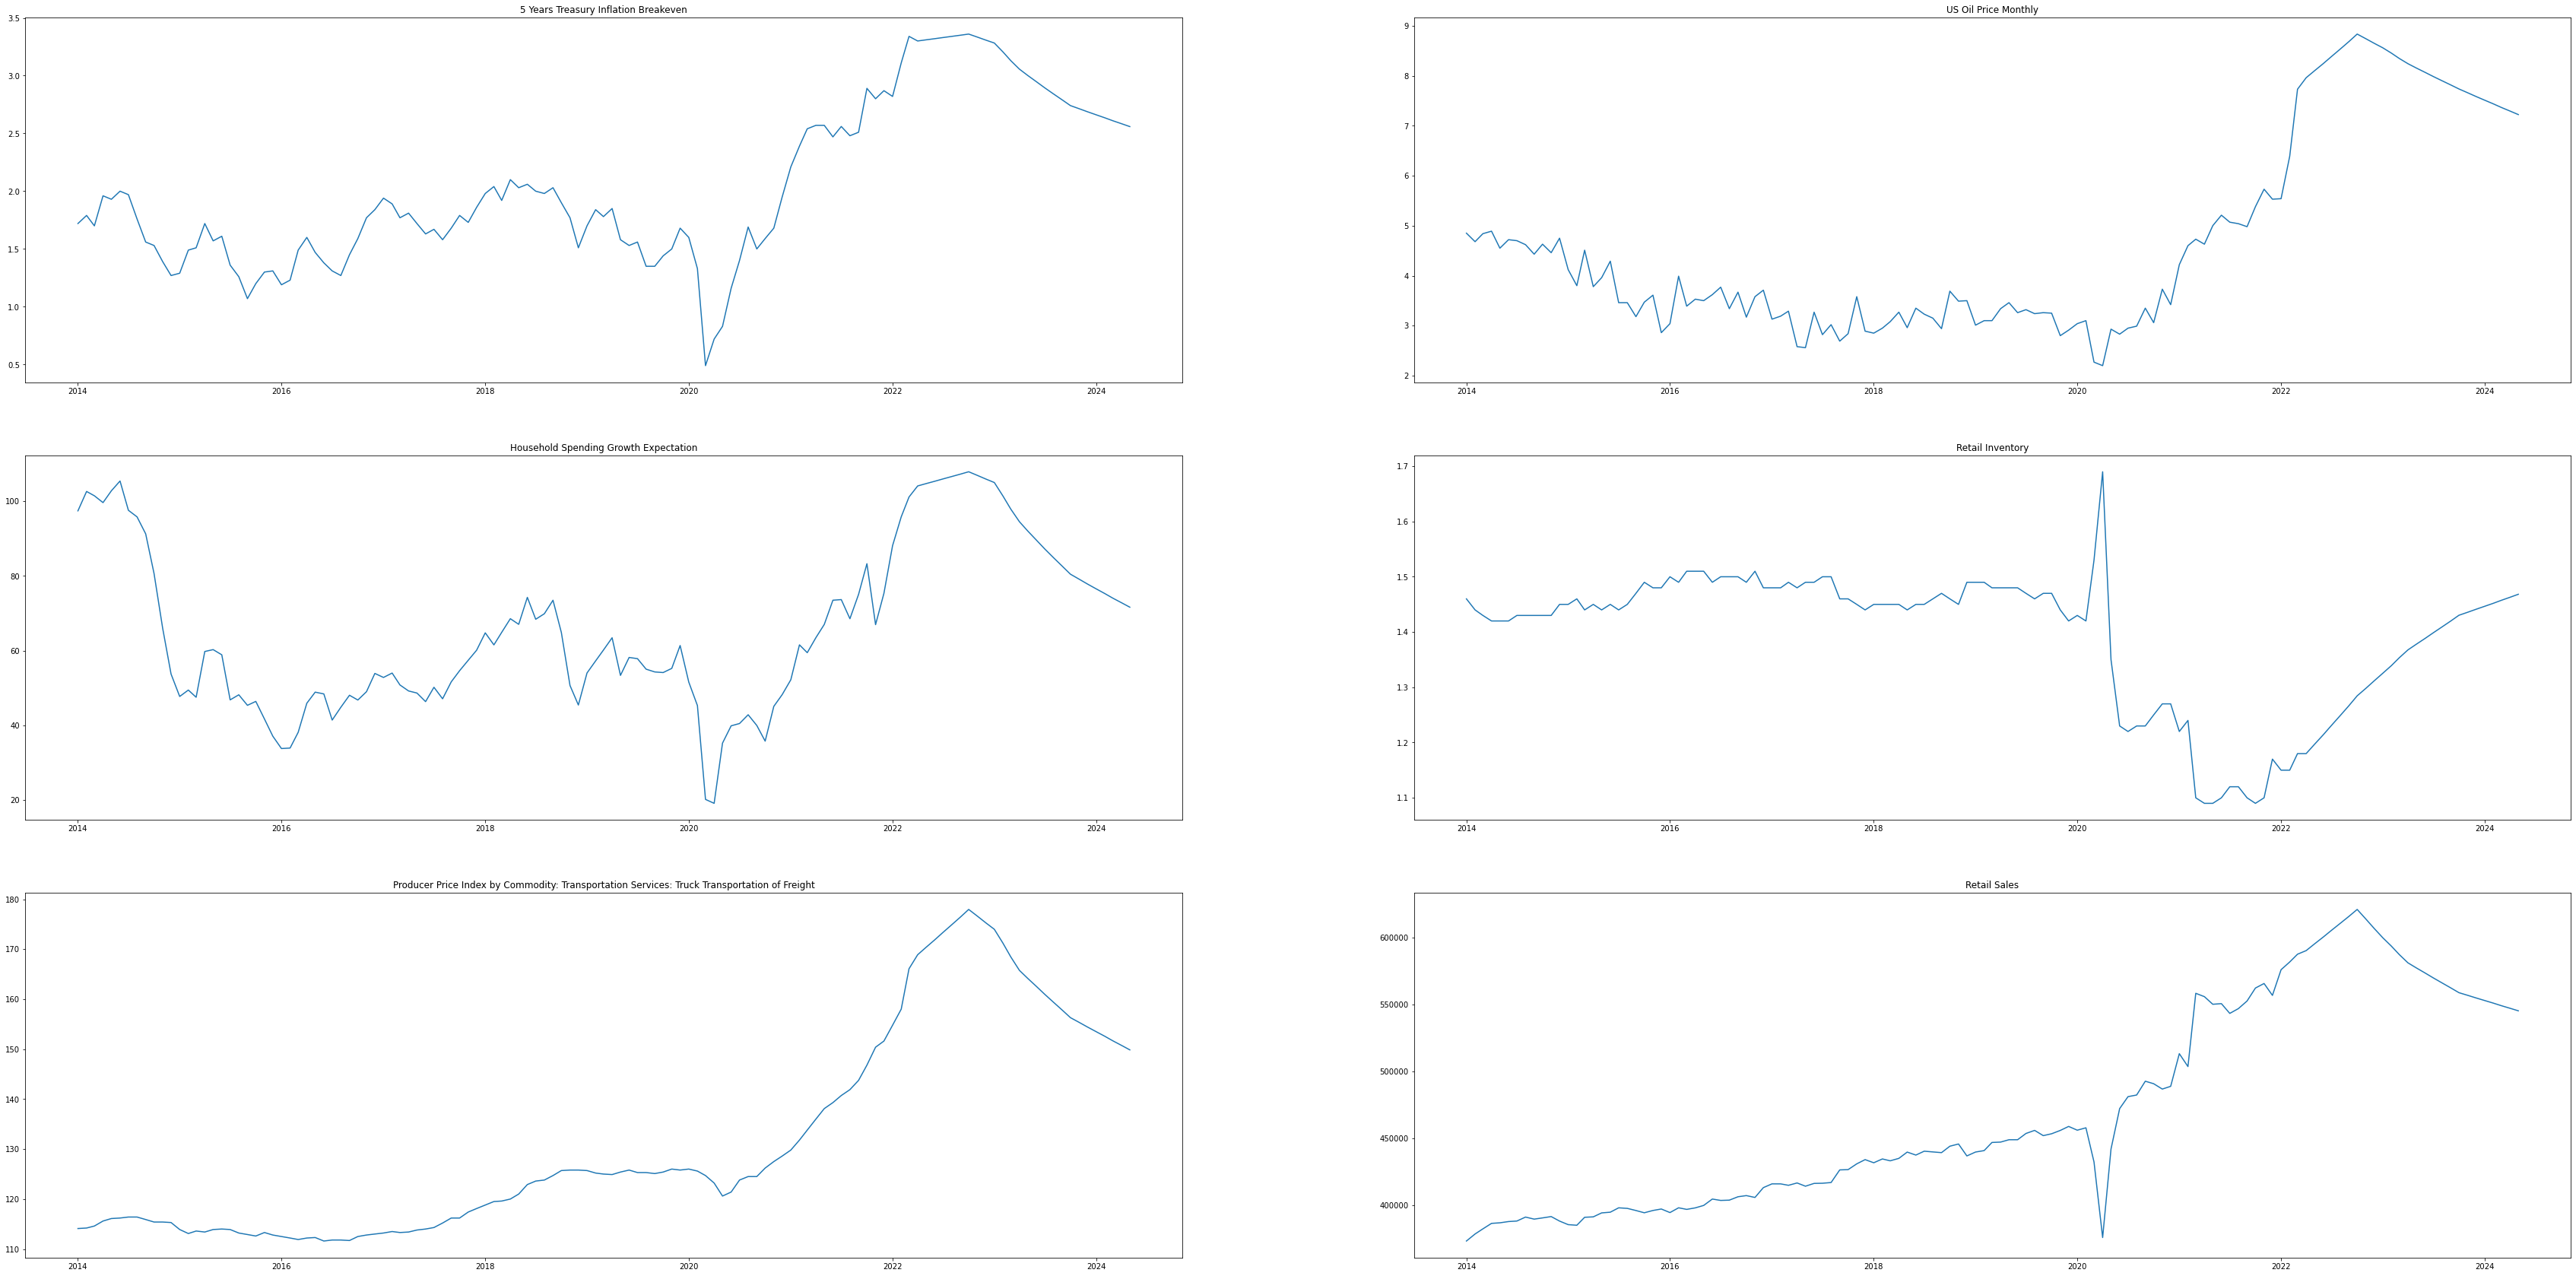

In [39]:
plot_proj(PPIB, 
    'DATE',
    '5 Years Treasury Inflation Breakeven', 
    'US Oil Price Monthly', 
    'Household Spending Growth Expectation', 
    'Retail Inventory', 
    'Producer Price Index by Commodity: Transportation Services: Truck Transportation of Freight', 
    'Retail Sales'
    )

### PPI C

In [40]:
T5YIEP = [0.35, -0.65, -2.1, -1.675, -0.755]
USOILP = [1.95, -0.975, -1.175, -0.955, -0.85]
HHP = [0.7, -0.85, -3.35, -2.475, -1.5]
RETAILINVP = [1.385, 1, 1, 0.7, 0.35]
TRUCKP = [0.925, -0.7, -1.5, -0.925, -0.5]
MFSP = [1.05, -0.915, -0.825, -0.425, -0.285]

projection(PPIC, T5YIEP, USOILP, HHP, RETAILINVP, TRUCKP, RS)

projection of PPIC is done


,DATE,PCU483111483111,T5YIE,HH,USOIL,RETAILINV,TRUCK,RETAILS
101,2022-06-01,NaN,3.323140,8.273467,105.587852,1.212912,172.030953,600336.049213
102,2022-07-01,NaN,3.334771,8.434799,106.326967,1.229711,173.622239,605438.905631
103,2022-08-01,NaN,3.346443,8.599278,107.071256,1.246743,175.228245,610585.136329
104,2022-09-01,NaN,3.358156,8.766964,107.820755,1.264010,176.849106,615775.109988
105,2022-10-01,NaN,3.369909,8.937920,108.575500,1.281517,178.484960,621009.198423
106,2022-11-01,NaN,3.348005,8.850775,107.652608,1.294332,177.235566,613867.592641
107,2022-12-01,NaN,3.326243,8.764480,106.737561,1.307275,175.994917,606808.115325
108,2023-01-01,NaN,3.304622,8.679026,105.830292,1.320348,174.762952,599829.821999
109,2023-02-01,NaN,3.235225,8.577048,102.284977,1.333551,172.141508,593531.608868
110,2023-03-01,NaN,3.167285,8.476267,98.858430,1.346887,169.559385,587299.526975


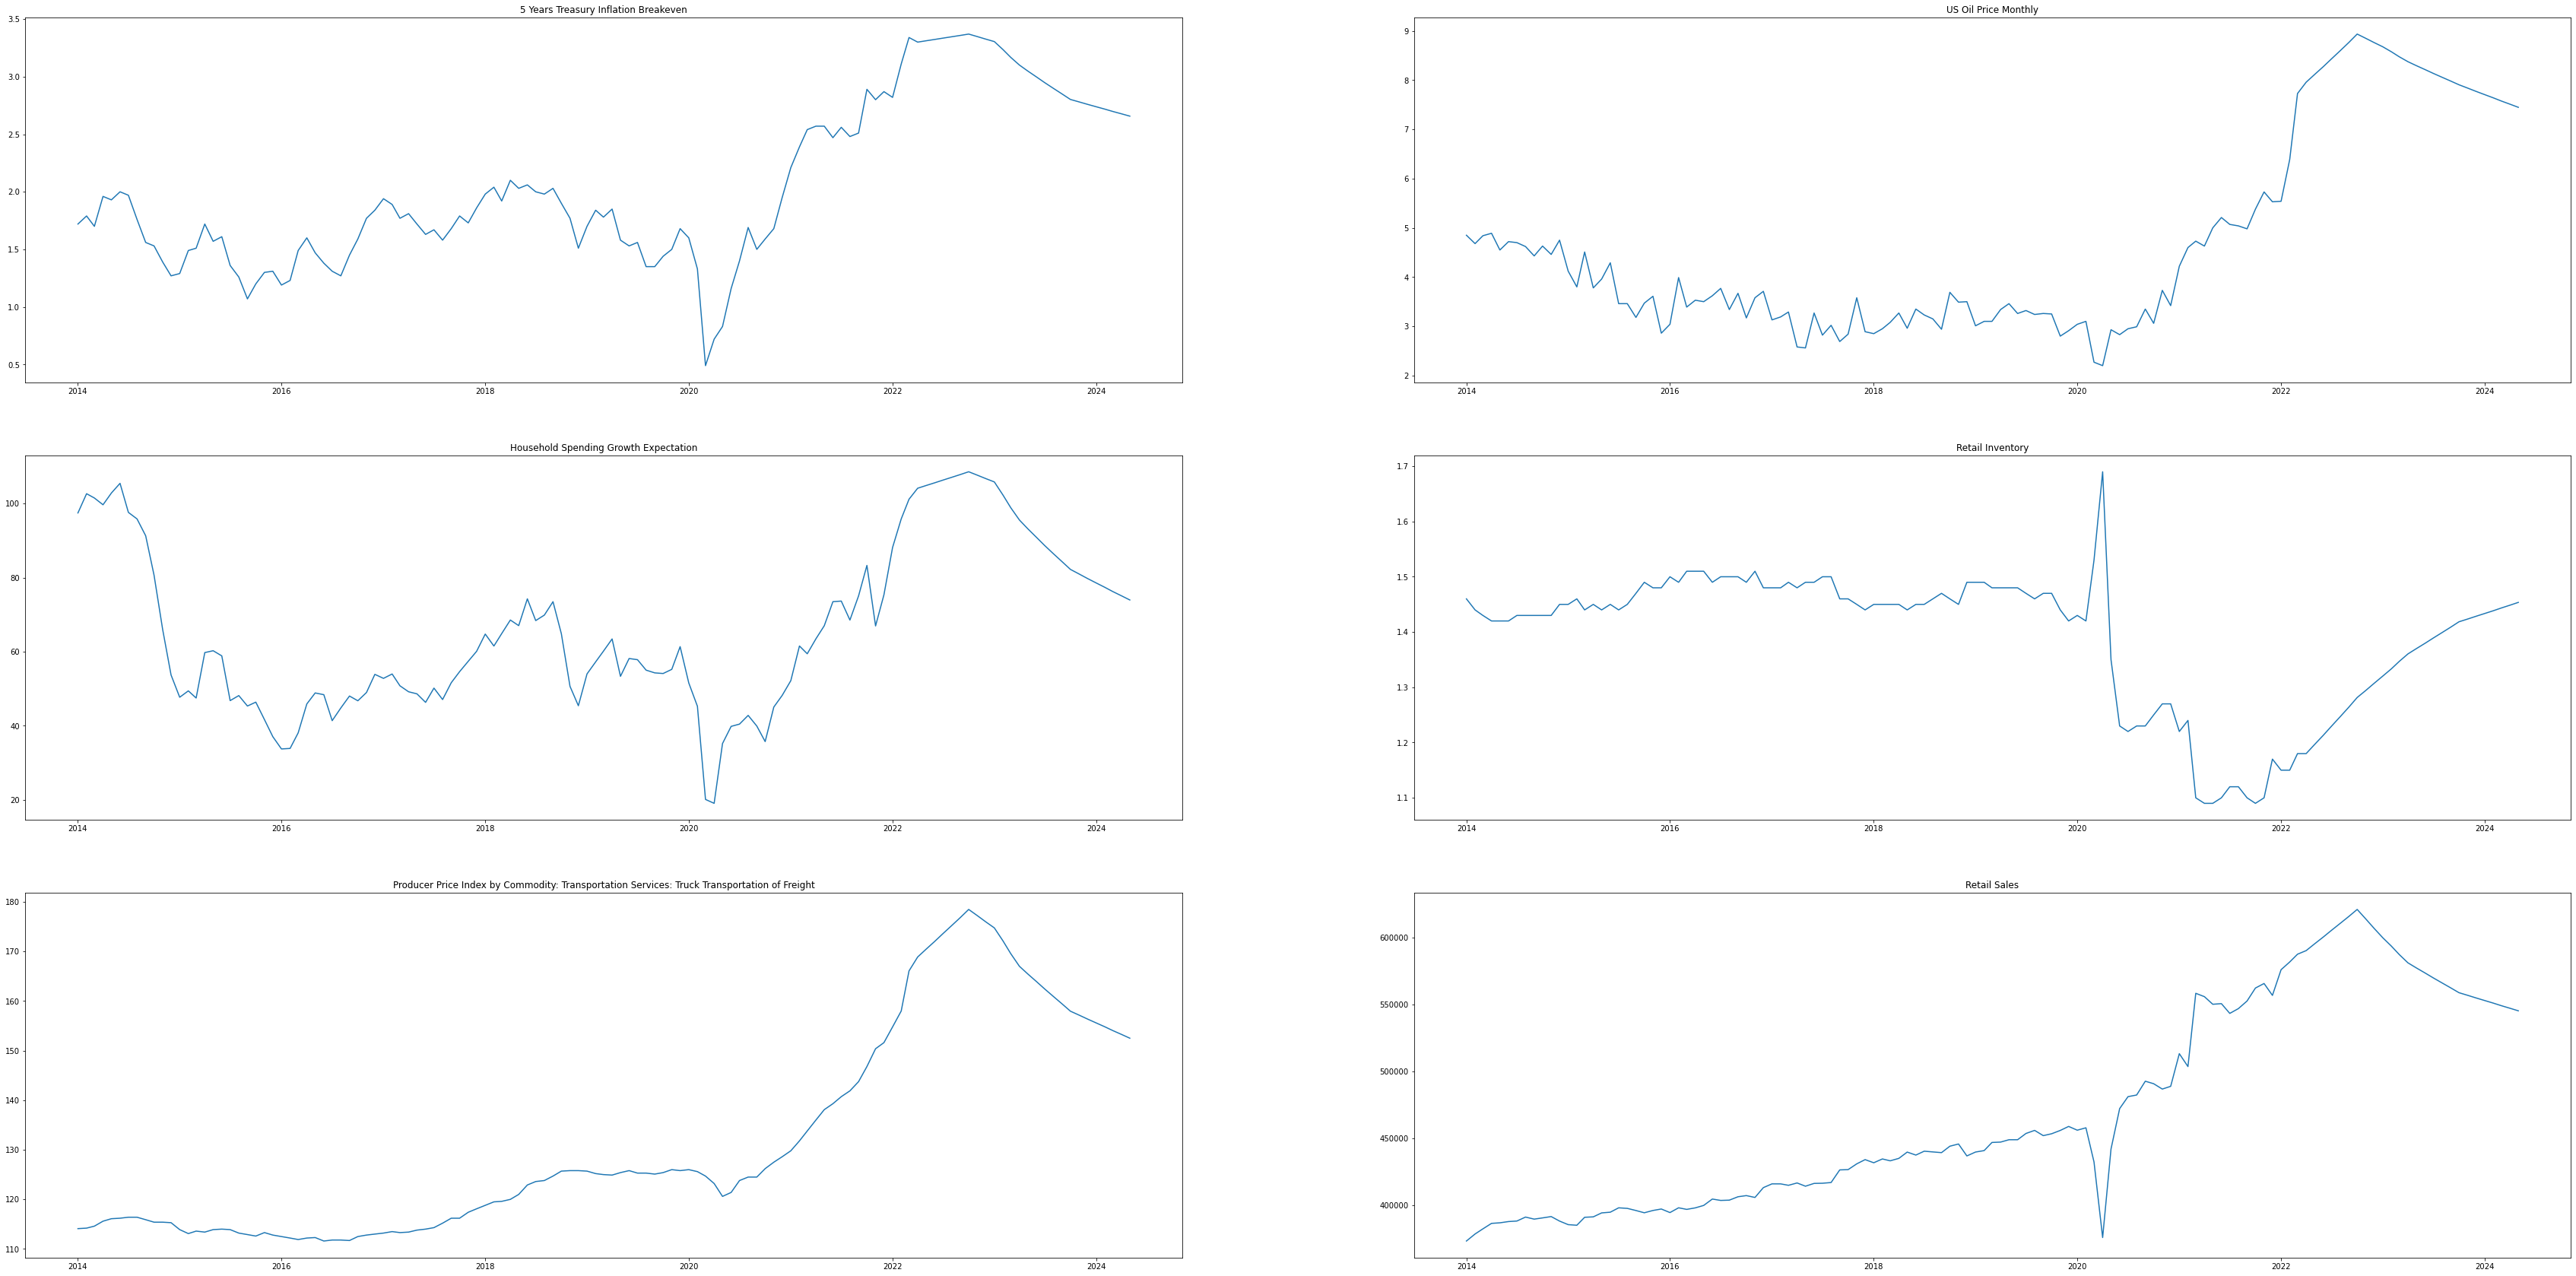

In [41]:
plot_proj(PPIC, 
    'DATE',
    '5 Years Treasury Inflation Breakeven', 
    'US Oil Price Monthly', 
    'Household Spending Growth Expectation', 
    'Retail Inventory', 
    'Producer Price Index by Commodity: Transportation Services: Truck Transportation of Freight', 
    'Retail Sales'
    )

### PPI D

In [42]:
T5YIEP = [0.4, -0.505, -1.985, -1.495, -0.515]
HHP = [0.8, -0.8, -3.115, -2.295, -1.3]
USOILP = [2.1, -1.05, -1.075, -0.8, -0.715]
RETAILINVP = [1.345, 0.95, 0.95, 0.65, 0.3]
TRUCKP = [1.05, -0.675, -1.375, -0.9, -0.4]
MFSP = [1.175, -0.895, -0.795, -0.385, -0.255]

projection(PPID, T5YIEP, USOILP, HHP, RETAILINVP, TRUCKP, RS)

projection of PPID is done


,DATE,PCU483111483111,T5YIE,HH,USOIL,RETAILINV,TRUCK,RETAILS
101,2022-06-01,NaN,3.326453,8.297830,105.797664,1.211955,172.457352,600336.049213
102,2022-07-01,NaN,3.339759,8.472085,106.644045,1.228256,174.268155,605438.905631
103,2022-08-01,NaN,3.353118,8.649999,107.497198,1.244776,176.097970,610585.136329
104,2022-09-01,NaN,3.366530,8.831649,108.357175,1.261519,177.946999,615775.109988
105,2022-10-01,NaN,3.379996,9.017113,109.224033,1.278486,179.815442,621009.198423
106,2022-11-01,NaN,3.362927,8.922433,108.350240,1.290632,178.601688,613867.592641
107,2022-12-01,NaN,3.345944,8.828748,107.483438,1.302893,177.396127,606808.115325
108,2023-01-01,NaN,3.329047,8.736046,106.623571,1.315270,176.198703,599829.821999
109,2023-02-01,NaN,3.262966,8.642134,103.302247,1.327765,173.775971,593531.608868
110,2023-03-01,NaN,3.198196,8.549231,100.084382,1.340379,171.386551,587299.526975


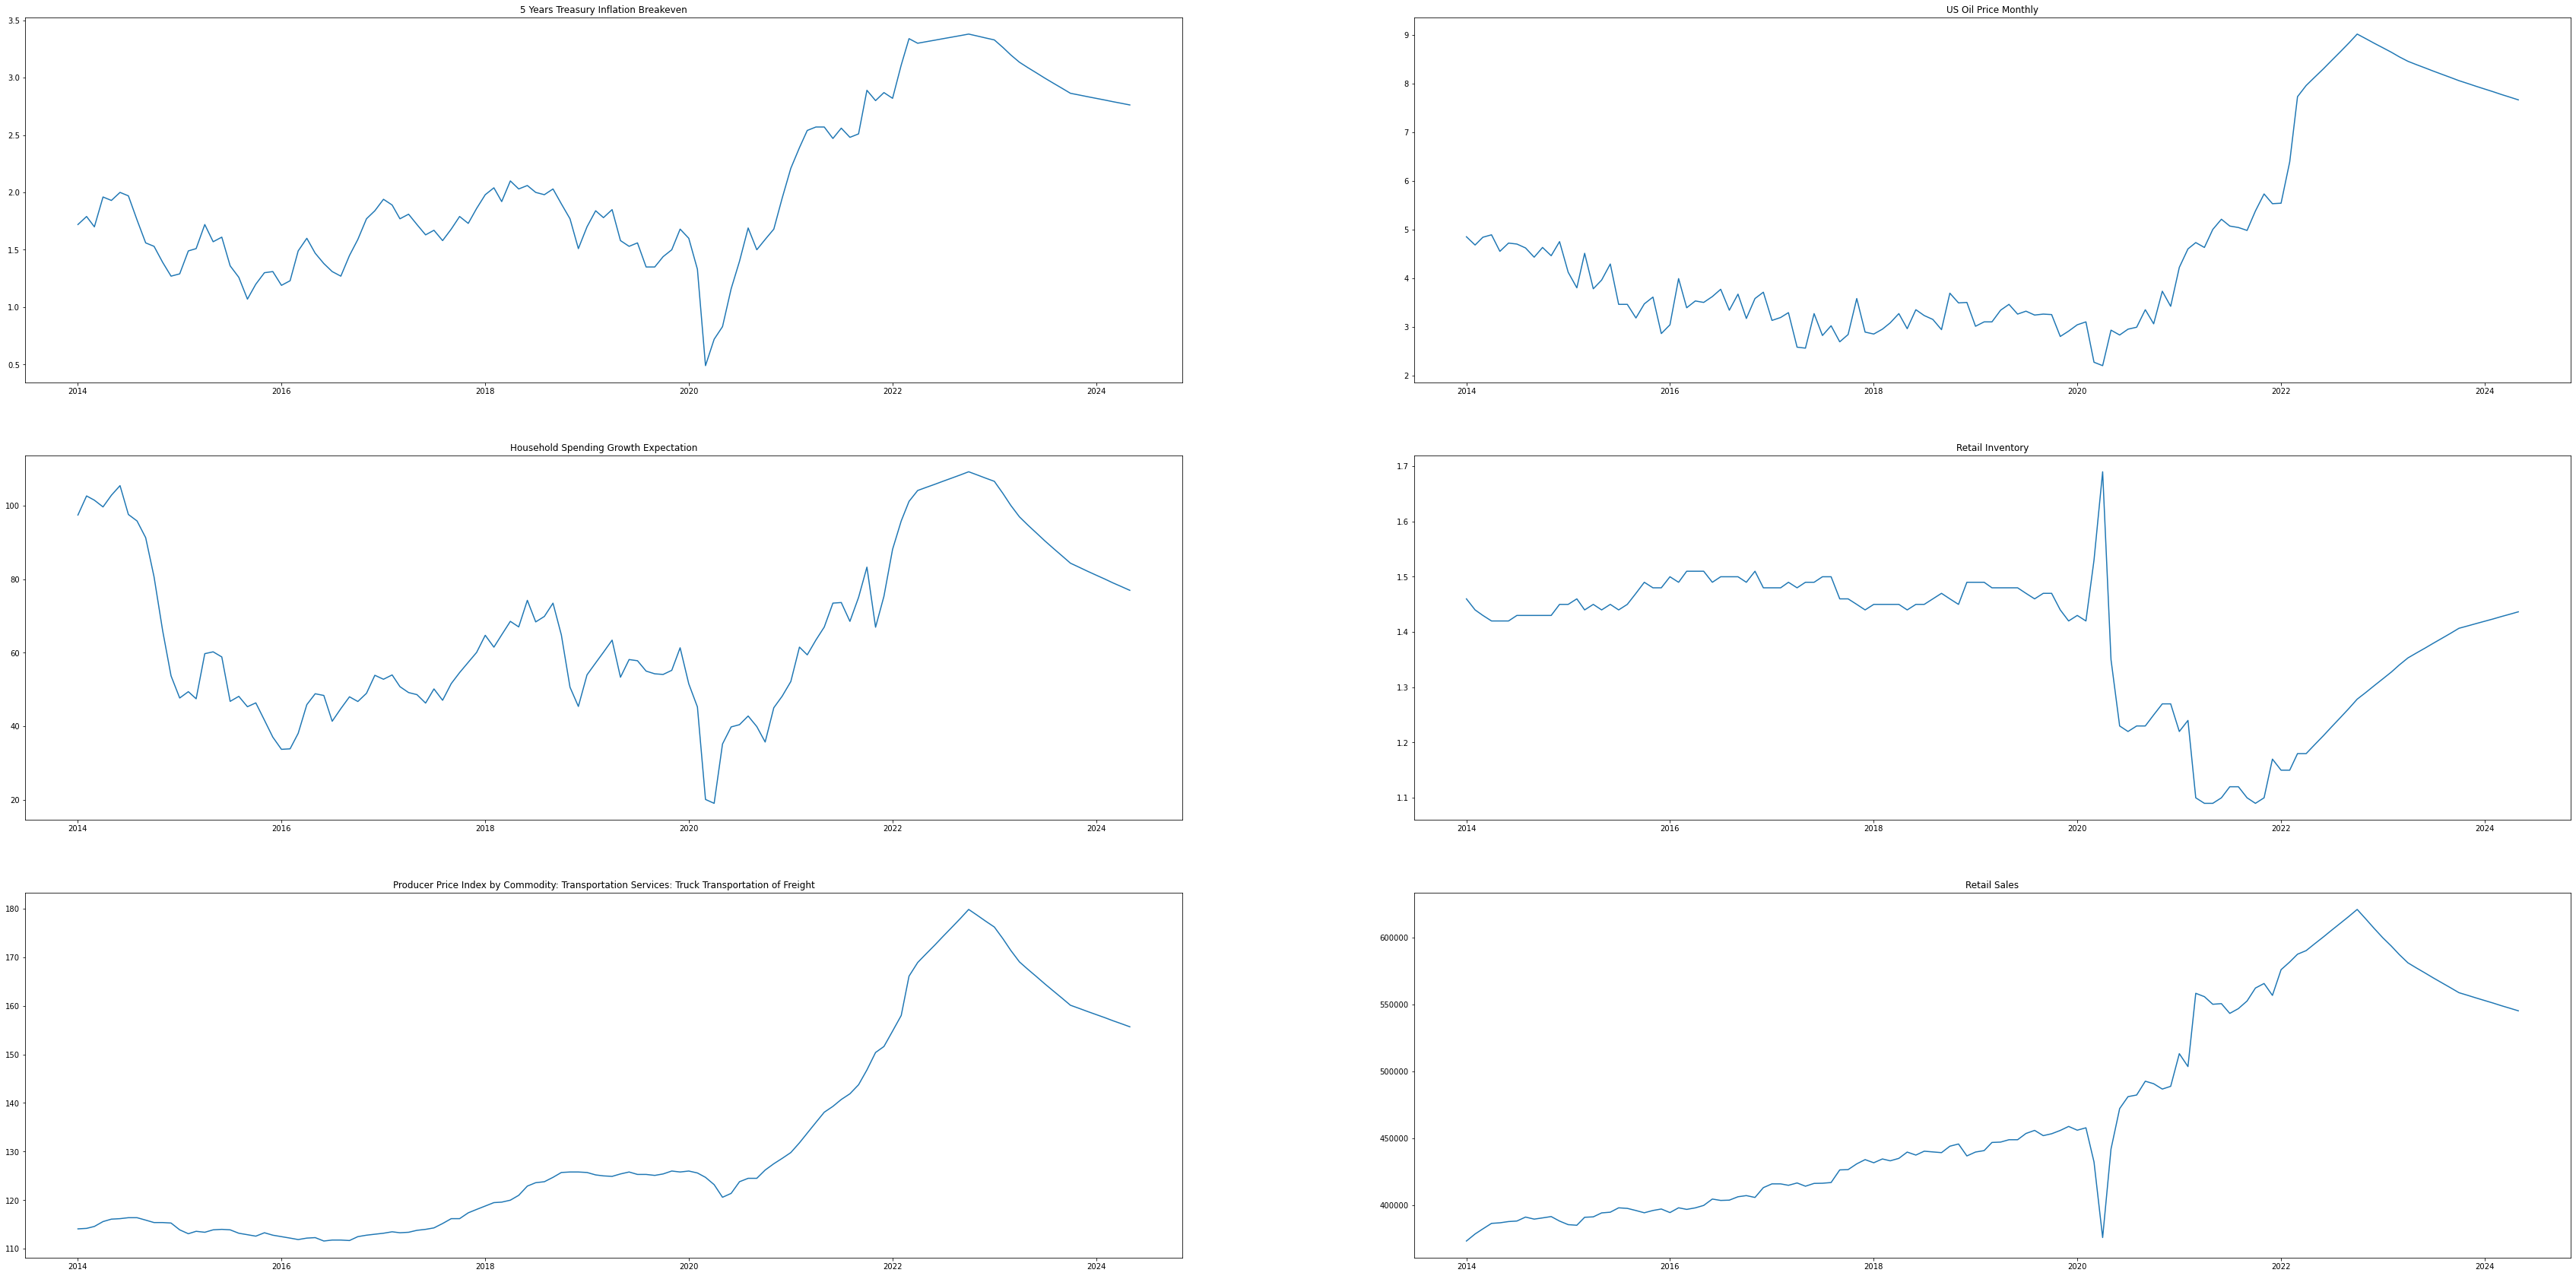

In [43]:
plot_proj(PPID, 
    'DATE',
    '5 Years Treasury Inflation Breakeven', 
    'US Oil Price Monthly', 
    'Household Spending Growth Expectation', 
    'Retail Inventory', 
    'Producer Price Index by Commodity: Transportation Services: Truck Transportation of Freight', 
    'Retail Sales'
    )

# Regression Model
***

### Functions

In [44]:
def residual(reg_model, X_train, y_train, X_test, y_test):
    plt.style.use('fivethirtyeight')
    
    ## plotting residual errors in training data
    plt.scatter(reg_model.predict(X_train), reg_model.predict(X_train) - y_train,
                color = "green", s = 10, label = 'Train data')
    
    ## plotting residual errors in test data
    plt.scatter(reg_model.predict(X_test), reg_model.predict(X_test) - y_test,
                color = "blue", s = 10, label = 'Test data')
    
    ## plotting line for zero residual error
    plt.hlines(y = 0, xmin = int(min(reg_model.predict(X_train))*0.8), xmax = int(max(reg_model.predict(X_train))*1.2), linewidth = 2)
    
    ## plotting legend
    plt.legend(loc = 'upper right')
    
    ## plot title
    plt.title("Residual errors")
    
    return plt.show()

### Linear Regression

In [45]:
X1, y1 = CASS.iloc[:,2:8], CASS.iloc[:,1]
X2, y2 = PPI.iloc[:,2:8], PPI.iloc[:,1]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.7, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.7, random_state=42)

reg1 = linear_model.LinearRegression().fit(X1_train, y1_train)
reg2 = linear_model.LinearRegression().fit(X2_train, y2_train)

In [46]:
y2_predict = reg2.predict(X2_test)

score2 = metrics.mean_absolute_error(y2_test, y2_predict)
print('MAE for model 2 is :',score2)

MAE for model 2 is : 7.455758098578737


### Lasso

In [47]:
# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X2, y2)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -7.383
Config: {'alpha': 0.06}


### Ridge

In [48]:
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X2, y2)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -7.382
Config: {'alpha': 0.99}


### Elastic Net

In [49]:
# define model
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X2, y2)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -7.383
Config: {'alpha': 0.01, 'l1_ratio': 0.0}


## Regression Application

In [50]:
model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [65]:
results = search.fit(X1, y1)
print('MAE 1: %.3f' % results.best_score_)
print('Config 1: %s' % results.best_params_)

results = search.fit(X2, y2)
print('MAE 2: %.3f' % results.best_score_)
print('Config 2: %s' % results.best_params_)

MAE 1: -0.101
Config 1: {'alpha': 0.21}
MAE 2: -7.382
Config 2: {'alpha': 0.99}


In [52]:
# define model
model1 = Ridge(alpha=0.21)
model2 = Ridge(alpha=0.99)
model1 = model1.fit(X1, y1)
model2 = model2.fit(X2, y2)

In [53]:
print('Variance score model 1: {}'.format(model1.score(X1_test, y1_test)),'Variance score model 2: {}'.format(model2.score(X2_test, y2_test)))

Variance score model 1: 0.9182407986427518 Variance score model 2: 0.947487046382085


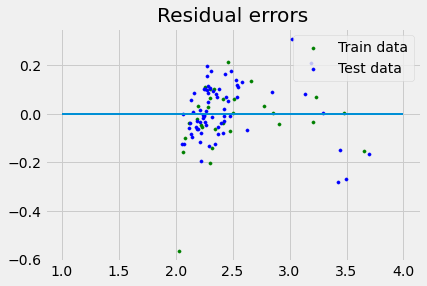

In [54]:
residual(model1, X1_train, y1_train, X1_test, y1_test)

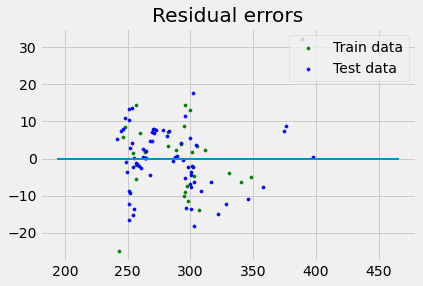

In [55]:
residual(model2, X2_train, y2_train, X2_test, y2_test)

In [56]:
def pred(model, row, df):
    return model.predict([np.array(df.iloc[row,2:8], dtype=float)])

In [57]:
for r in range(100, len(CASSA.index)):
    CASSA.iloc[r,1] = pred(model1, r, CASSA)
    CASSB.iloc[r,1] = pred(model1, r, CASSB)
    CASSC.iloc[r,1] = pred(model1, r, CASSC)
    CASSD.iloc[r,1] = pred(model1, r, CASSD)
    PPIA.iloc[r,1] = pred(model2, r, PPIA)
    PPIB.iloc[r,1] = pred(model2, r, PPIB)
    PPIC.iloc[r,1] = pred(model2, r, PPIC)
    PPID.iloc[r,1] = pred(model2, r, PPID)

In [58]:
df_merged = pd.concat([
    CASSA.iloc[:,0],
    CASSA.iloc[:,1], 
    CASSB.iloc[:,1], 
    CASSC.iloc[:,1], 
    CASSD.iloc[:,1], 
    PPIA.iloc[:,1], 
    PPIB.iloc[:,1], 
    PPIC.iloc[:,1], 
    PPID.iloc[:,1]
    ], axis=1)
df_merged.columns = [
    'Date',
    'CASS A',
    'CASS B',
    'CASS C',
    'CASS D',
    'PPI A',
    'PPI B',
    'PPI C',
    'PPI D'
    ]
df_merged.tail(30)

,Date,CASS A,CASS B,CASS C,CASS D,PPI A,PPI B,PPI C,PPI D
95,2021-12-01,3.596000,3.596000,3.596000,3.596000,365.693000,365.693000,365.693000,365.693000
96,2022-01-01,3.704000,3.704000,3.704000,3.704000,367.044000,367.044000,367.044000,367.044000
97,2022-02-01,3.764000,3.764000,3.764000,3.764000,367.258000,367.258000,367.258000,367.258000
98,2022-03-01,3.806000,3.806000,3.806000,3.806000,356.218000,356.218000,356.218000,356.218000
99,2022-04-01,3.865000,3.865000,3.865000,3.865000,396.763000,396.763000,396.763000,396.763000
100,2022-05-01,3.688394,3.693376,3.698125,3.702875,400.292384,400.829076,400.967648,401.596712
101,2022-06-01,3.670875,3.681813,3.692195,3.702488,403.330262,404.408556,404.684646,405.952308
102,2022-07-01,3.647257,3.665393,3.682508,3.699304,406.379962,408.004736,408.417176,410.333024
103,2022-08-01,3.616341,3.643257,3.668465,3.692928,409.441411,411.617508,412.165013,414.738684
104,2022-09-01,3.576693,3.614388,3.649377,3.682910,412.514531,415.246754,415.927920,419.169102


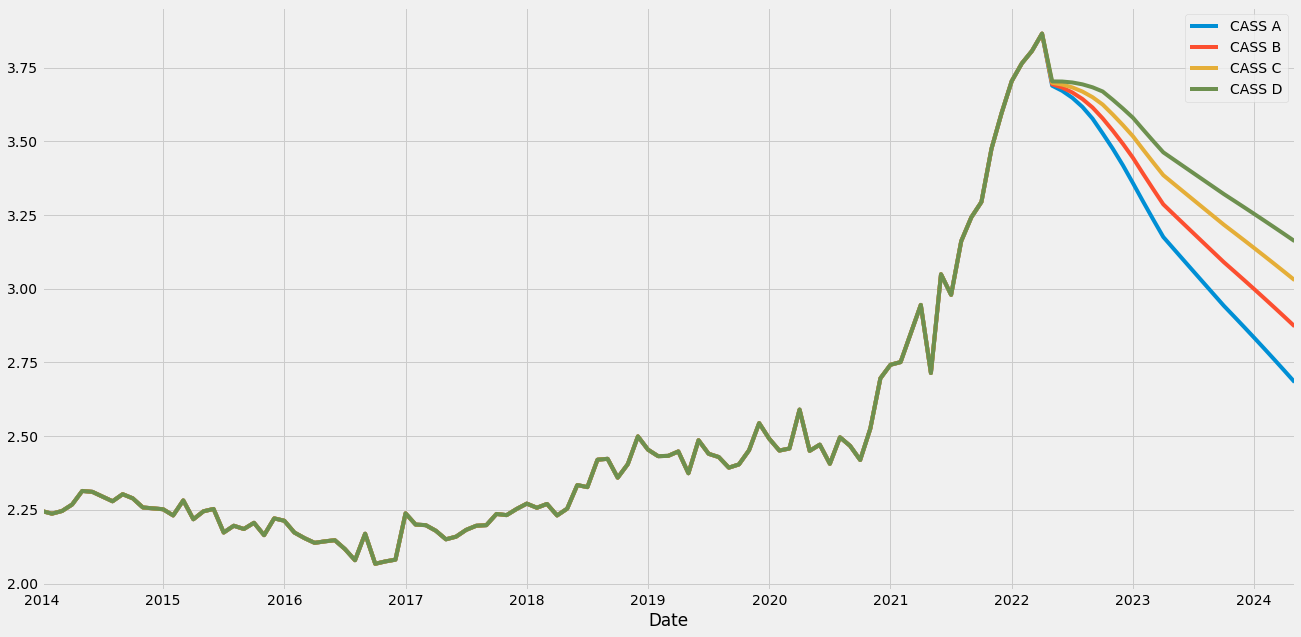

In [59]:
df_merged.plot(x="Date", y=['CASS A','CASS B','CASS C','CASS D'],
        kind="line", figsize=(20, 10))
plt.show()

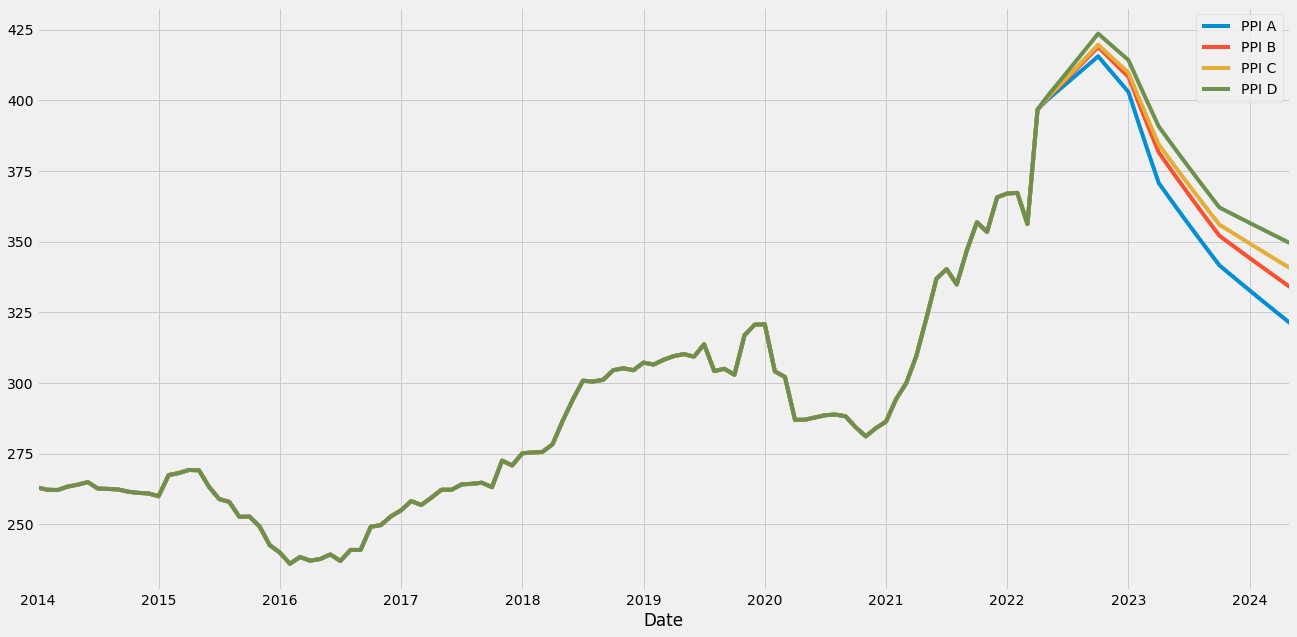

In [60]:
df_merged.plot(x="Date", y=['PPI A','PPI B','PPI C','PPI D'],
        kind="line", figsize=(20, 10))
plt.show()

### Save to CSV

In [61]:
CASSF = df_merged.iloc[100:125,[0,1,2,3,4]].reset_index(drop=True)
PPIF = df_merged.iloc[100:125,[0,5,6,7,8]].reset_index(drop=True)

In [62]:
CASSF

,Date,CASS A,CASS B,CASS C,CASS D
0,2022-05-01,3.688394,3.693376,3.698125,3.702875
1,2022-06-01,3.670875,3.681813,3.692195,3.702488
2,2022-07-01,3.647257,3.665393,3.682508,3.699304
3,2022-08-01,3.616341,3.643257,3.668465,3.692928
4,2022-09-01,3.576693,3.614388,3.649377,3.682910
5,2022-10-01,3.526590,3.577590,3.624443,3.668740
6,2022-11-01,3.474779,3.535912,3.590672,3.640714
7,2022-12-01,3.418680,3.491366,3.554832,3.611029
8,2023-01-01,3.357800,3.443664,3.516737,3.579544
9,2023-02-01,3.295595,3.389976,3.471946,3.539757


In [63]:
PPIF

,Date,PPI A,PPI B,PPI C,PPI D
0,2022-05-01,400.292384,400.829076,400.967648,401.596712
1,2022-06-01,403.330262,404.408556,404.684646,405.952308
2,2022-07-01,406.379962,408.004736,408.417176,410.333024
3,2022-08-01,409.441411,411.617508,412.165013,414.738684
4,2022-09-01,412.514531,415.246754,415.927920,419.169102
5,2022-10-01,415.599241,418.892356,419.705651,423.624079
6,2022-11-01,411.361064,415.347790,416.374862,420.479310
7,2022-12-01,407.156166,411.826095,413.064175,417.351226
8,2023-01-01,402.984305,408.327136,409.773480,414.239764
9,2023-02-01,391.986204,399.231756,401.146053,406.277043


In [64]:
df_merged.to_csv('Output\Final_01_Merged-Data.csv', index=False)
CASSF.to_csv('Output\Final_02_CASSF.csv', index=False)
PPIF.to_csv('Output\Final_03_PPIF.csv', index=False)